<font color='Tomato'><h1><center>Credit EDA CASE STUDY</center></h1></font>

### Import Libraries

In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import os
import warnings
warnings.filterwarnings('ignore')

### Reading the datasets

In [2]:
#Reading dataset from local
application=pd.read_csv("application_data.csv")
previous=pd.read_csv("previous_application.csv")

### Data understanding

In [3]:
#printing shape of the dataframe.
application.shape

(307511, 122)

In [4]:
# Information of variables to check their data types.
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Look at the head of the dataframe.
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Look at the tail of the dataframe.
application.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [7]:
# Summary statistics of the dataframe.
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Handling Missing Values

<p style="font-family: Arial; font-size:1.0em;color:green;">Missing/Null values would impact the overall analysis resulting in inaccurate results. Columns can be removed if the missing values are quite significant in number. Now, lets calculate the percentage of Null values in each column of the dataframe. </p>

In [8]:
#Calculating percentage of missing/null values.
pd.set_option('display.max_rows',122)
round(application.isnull().sum()*100/len(application.index),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

### Drop the columns

<p style="font-family: Arial; font-size:1.0em;color:Green;">Dropping the columns in the application dataframe whose null values are greater than 13 percent.</p>

In [9]:
app_drop_col=application.columns[application.isnull().mean()>0.13]

In [10]:
application= application.drop(app_drop_col, axis = 1)
print(application.shape)

(307511, 65)


In [11]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

<p style="font-family: Arial; font-size:1.0em;color:Green;">We decided to drop the following columns which might not impact the bank in providing the loan to the customers after analysing application data frame</p>

In [12]:
app_drop=application.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']
application=application.drop(app_drop, axis=1)


In [13]:
application=application.drop(['FLAG_OWN_CAR','FLAG_OWN_REALTY','ORGANIZATION_TYPE'], axis=1)
print(application.shape)

(307511, 42)


In [14]:
#Updated column list in the data frame
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE

In [15]:
# Checking data type of the columns.
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

<p style="font-family: Arial; font-size:1.0em;color:Green;">Post dropping the unwanted columns, we can see that there is no necessity in changing the datatypes of the columns as each column has the required data type.

### Data Cleaning -- Only Analysis

In [16]:
#Checking the null value percentage of the new dataframe.
round(application.isnull().sum()*100/len(application.index),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY 

In [17]:
# We can see that the NAME_TYPE_SUITE column has null percentage >0
# Now, lets get the value counts for 'NAME_TYPE_SUITE'
application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:Green;">Analysis -  Since 'NAME_TYPE_SUITE' is a categorical column, it is best to replace/impute the missing value with the highest value count, i.e., 'Unaccompanied'.

`application.loc[pd.isnull(application['NAME_TYPE_SUITE']), ['NAME_TYPE_SUITE']] = "Unaccompanied"`

<p style="font-family: Arial; font-size:1.0em;color:Green;">From the application dataframe, <b>TARGET</b> variable is the key variable on which we will  perform the analysis as it describes whether the customer is facing any payment difficulties. It is binary variable and it has 2 values '1' and '0'<br>

`1 - client with payment difficulties/default case: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample`

`0 - all other cases`

### Outliers Analysis and Handling

<p style="font-family: Arial; font-size:1.0em;color:Green;">Now for the following  4 attributes <b>(AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE)</b> are numerical columns, let us analyse if there are any outliers.<br><br>And outliers can be best depicted using box- plot as it is easy to visualize the outliers with the help of whiskers.

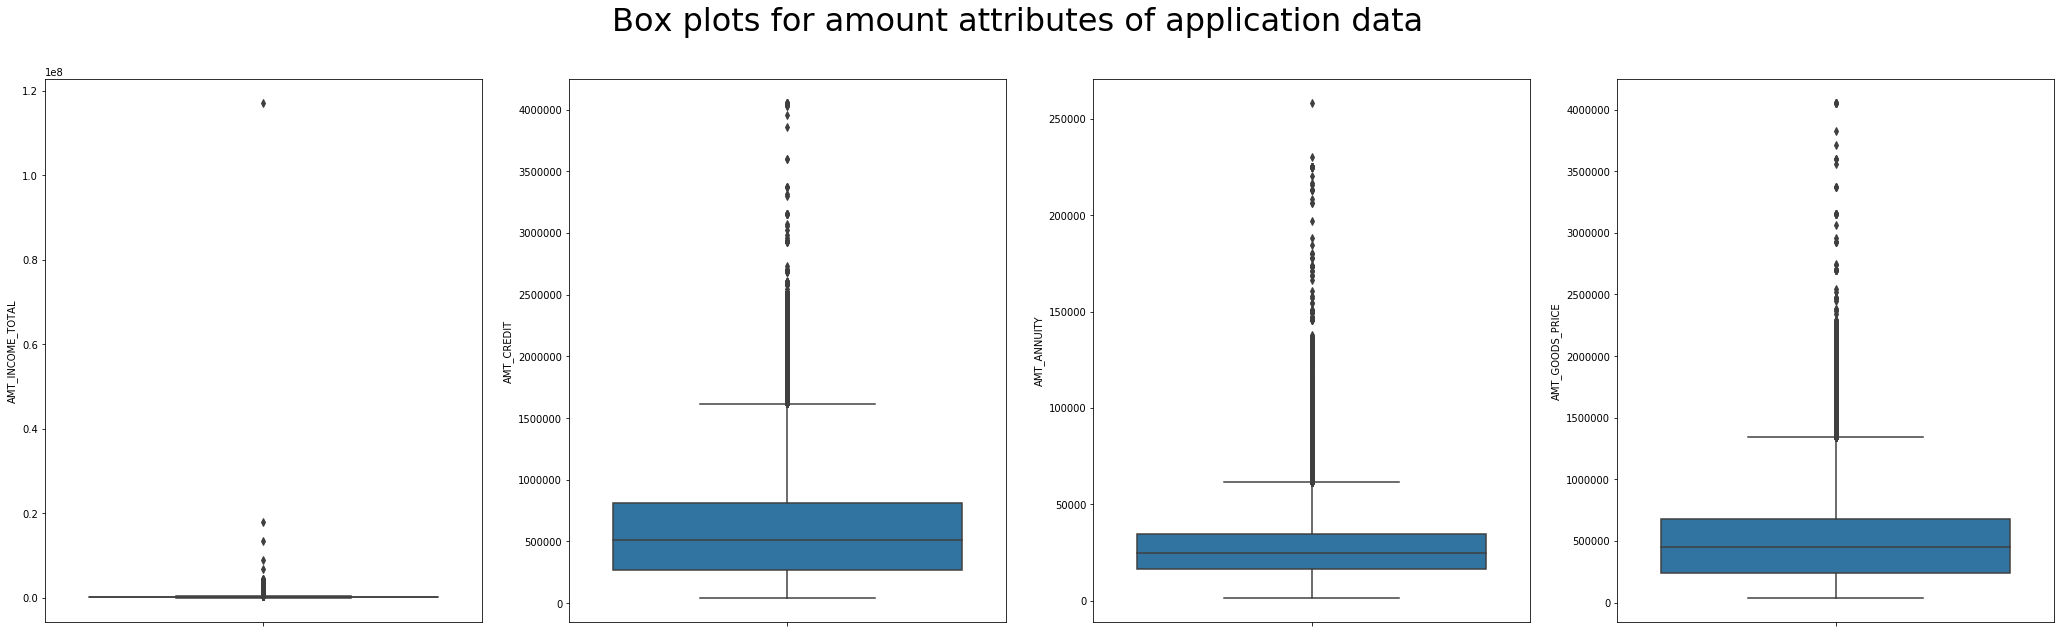

In [18]:
outlier_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
fig, axes = plt.subplots(1, len(outlier_columns), figsize=(36,10))
for column, ax in zip(outlier_columns,range(len(outlier_columns))):
    ax=sns.boxplot(y=application[column],ax=axes[ax])
plt.suptitle("Box plots for amount attributes of application data",fontsize=32)
plt.show()

figure = ax.get_figure()    

<p style="font-family: Arial; font-size:1.0em;color:Green;">Now let us analyze the outliers based on 'Target' variable.

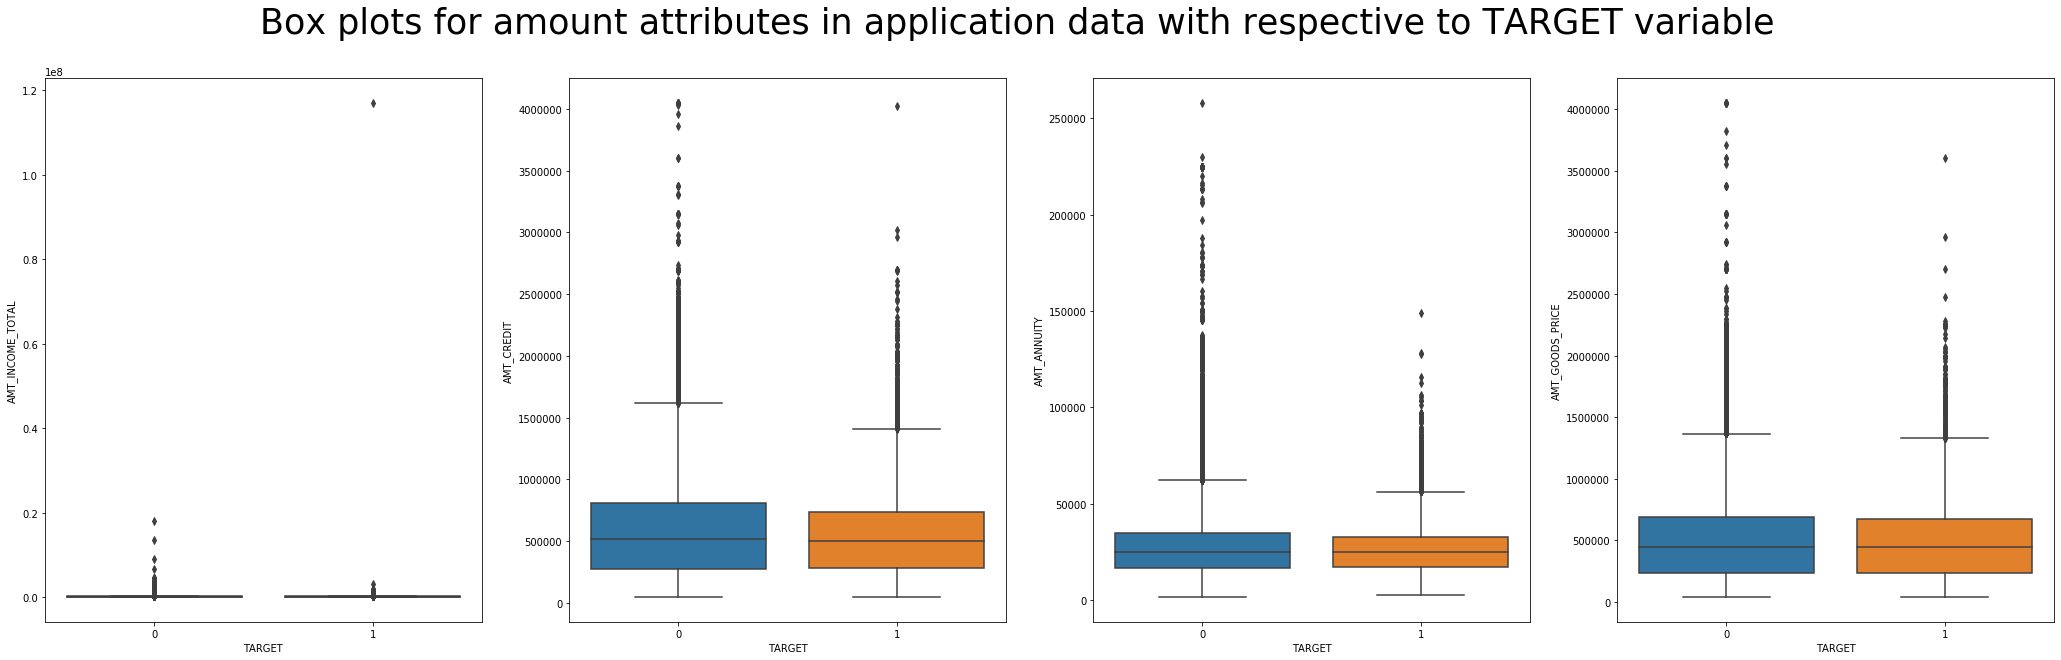

In [19]:
j=1
plt.figure(figsize=(36,10))
for i in outlier_columns:
    plt.subplot(1,4,j)
    sns.boxplot(x="TARGET", y=i, data = application)
    j=j+1
plt.suptitle("Box plots for amount attributes in application data with respective to TARGET variable",fontsize=35)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;"><b>Removing Outliers</b>
<br>From the above plots, we can clearly see that there are outliers in the data from the above plots. This will effect our data analysis and will not provide accurate results.<br>We can handle outliers using either inter quantile method or Z-value method.
    <br><b>Interquartile range method</b><br>So, inorder to overcome this problem,let's find q1(lower quantile) and q2(upper quantile) for 25th and 75th percentile and IQR i.e., interquartile range.<br>Then, we will consider the dataframe with all the rows having value greater than l=(q1-1.5*iqr) and less than h=(q1+1.5*iqr)<br> All the values which has the values greater than l and h are considered as the outliers and are dropped from the dataframe.
    <br><b>Z-Value Method</b><br>In addition, Outliers can also be calculated using Z-value by calculating mean and standard deviation and calculating upper and lower limits using upper = df.Weight.mean() + 3*df.Weight.std() and lower = df.Weight.mean() -3*df.Weight.std().And by selecting the values greater than lower limit and lower than upper limit , the outliers will be removed.
<br><b> Here, we are using interquartile range method</p>

In [20]:
# Create a function for removing the outliers.
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    l  = q1-1.5*iqr
    h = q3+1.5*iqr
    no_outliers = df[~((df[col_name] < l) | (df[col_name] > h)).any(axis=1)]
    return no_outliers

In [21]:
# Remove the outliers.
application=remove_outliers(application,outlier_columns)

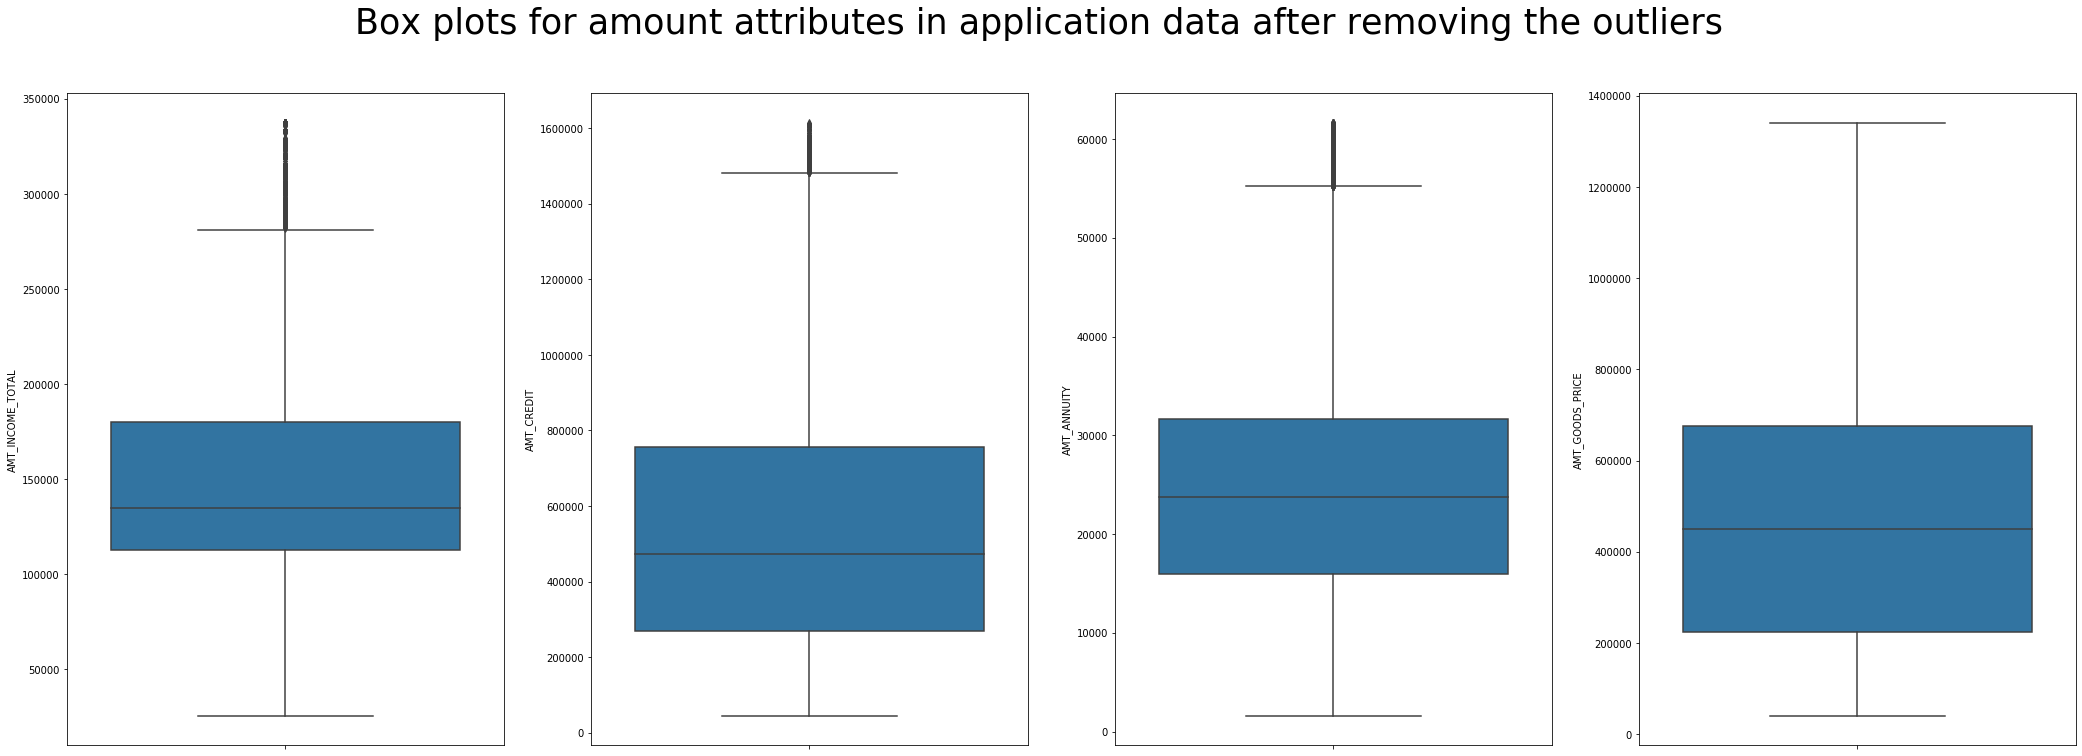

In [22]:
# Let's see the difference in plots.
fig, axes = plt.subplots(1, len(outlier_columns), figsize=(36,12))
for column, ax in zip(outlier_columns,range(len(outlier_columns))):
    sns.boxplot(y=application[column],ax=axes[ax])
plt.suptitle("Box plots for amount attributes in application data after removing the outliers",fontsize=35)
plt.show()

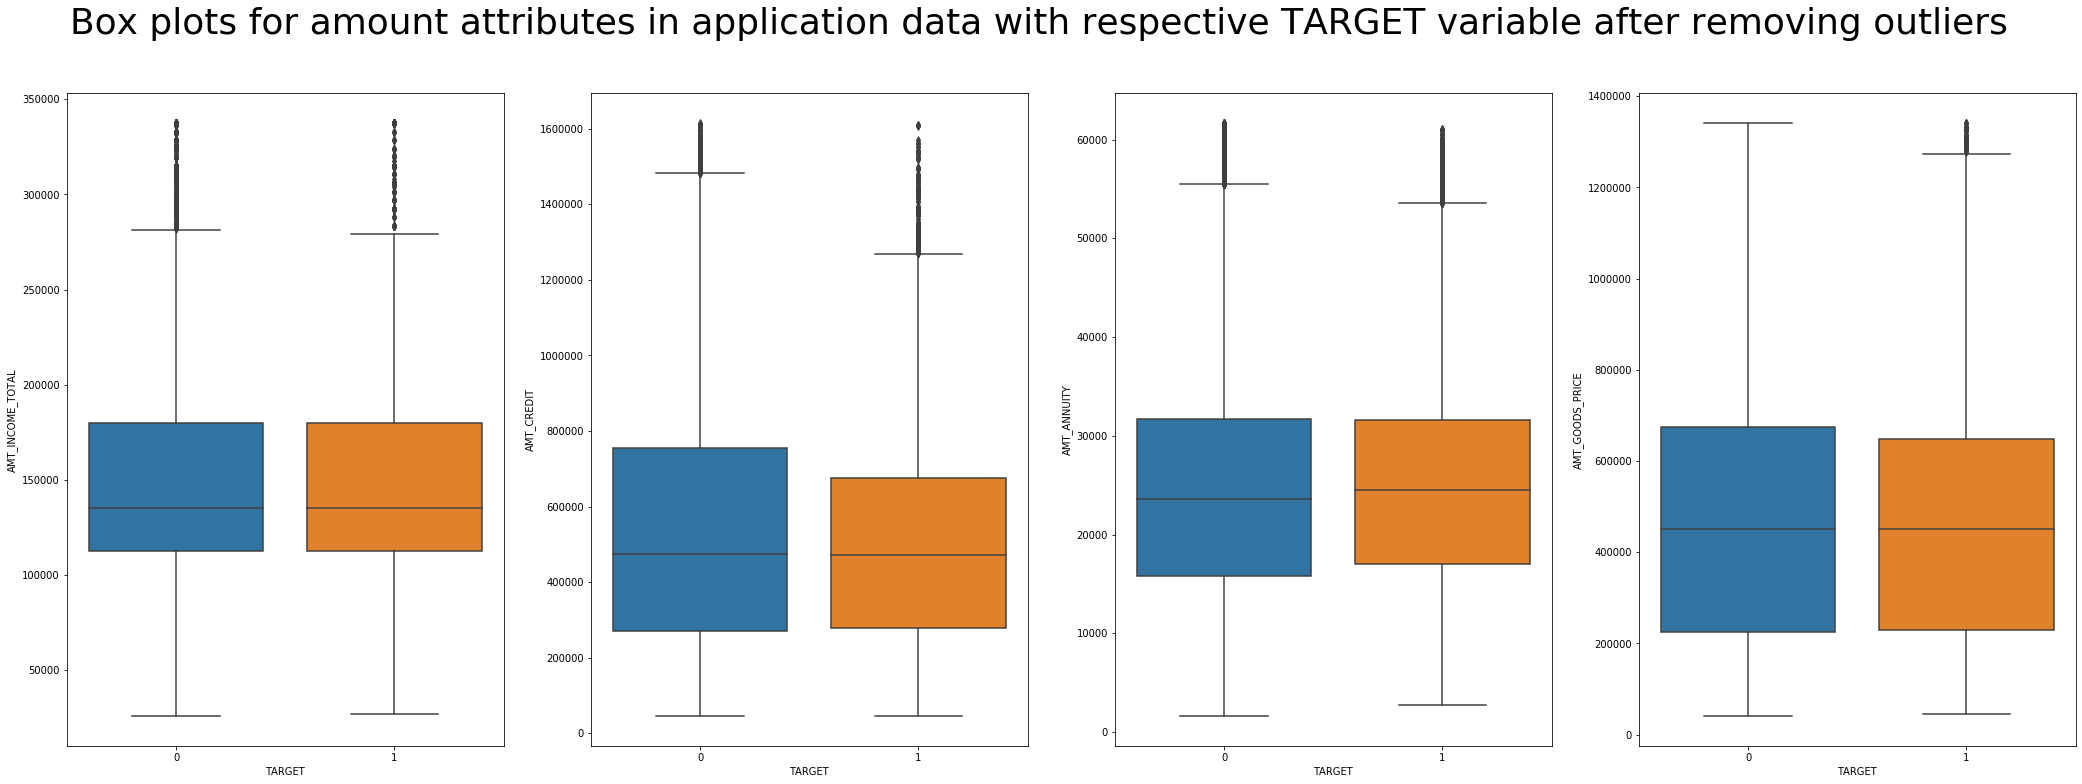

In [23]:
#checking the amount attributes against target variable post removing outliers
j=1
plt.figure(figsize=(36,12))
for i in outlier_columns:
    plt.subplot(1,4,j)
    sns.boxplot(x="TARGET", y=i, data = application)
    j=j+1
plt.suptitle("Box plots for amount attributes in application data with respective TARGET variable after removing outliers",fontsize=36)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;">After the outliers are removed in all the columns, the boxplot looks much sensible providing the insights of the features across the Targets 0 and 1 .</p>

### Binning of Continuous Variables

<p style="font-family: Arial; font-size:1.0em;color:Green;"> Binning is an appropriate method used to convert the continous variable to categorical variable.<br>Using the following 3 continous variables - 'AMT_INCOME_TOTAL', 'AMT_CREDIT' and 'DAYS_BIRTH', we binned them accordingly as: ('income_bins','credit_bins','age_bins') 

In [24]:
# Binning of 'AMT_INCOME_TOTAL'
bins=[0,50000,100000,150000,200000,250000,300000,400000,500000]
label=['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-400000','400000-500000']
application['income_bins']=pd.cut(application['AMT_INCOME_TOTAL'],bins,labels=label)

In [25]:
# Binning of 'AMT_CREDIT'
bins=[0,500000,1000000,1500000,2000000,2500000,3000000,4000000]
label=['0-500000','500000-1000000','1000000-1500000','1500000-2000000','2000000-2500000','2500000-3000000','3000000-4000000']
application['credit_bins']=pd.cut(application['AMT_CREDIT'],bins,labels=label)

In [26]:
# Binning of 'DAYS_BIRTH'
application['AGE']=application['DAYS_BIRTH']*-1/365
application['AGE']
bins=[0,10,20,30,40,50,60,70,100]
label=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-100']
application['age_bins']=pd.cut(application['AGE'],bins,labels=label)

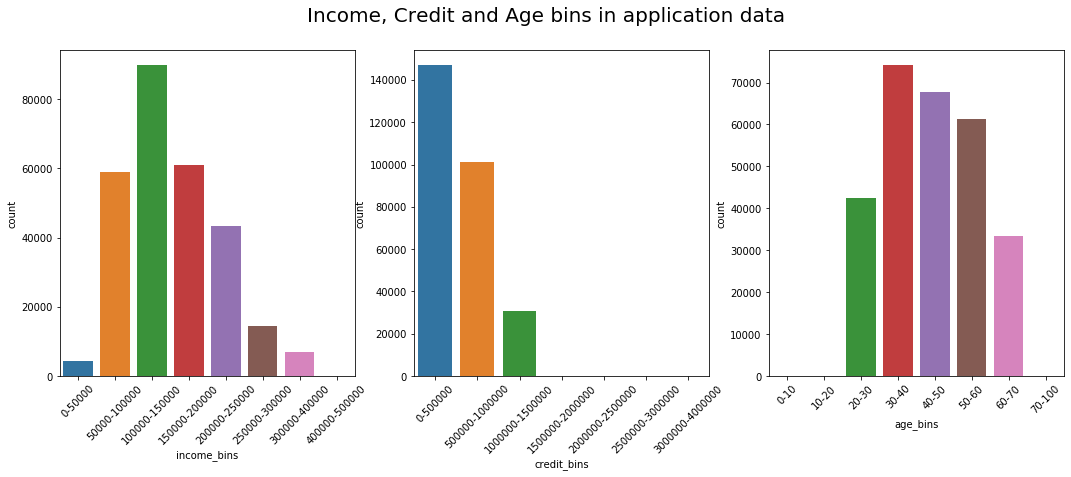

In [27]:
# Plotting the bins.
j=0
fig, axes = plt.subplots(1, 3, figsize=(18,6))
c_bins=['income_bins','credit_bins','age_bins']
for i in c_bins:
    f = sns.countplot(i,ax=axes[j],data=application)
    f.set_xticklabels(f.get_xticklabels(), rotation=45)
    j=j+1
plt.suptitle('Income, Credit and Age bins in application data',fontsize=20)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;">Below are the insights from the binning of the continous variables:<br>
    1. Customers with income between 100000 - 150000 are more than any other income group and least number of customers have the income ranging from 0-50000<br>
    2. People in the age group of 30 - 40 have applied for loan more than any other age group.<br>
    3. Most of the customers have credit amount in the range of 0 - 500000
    

### Analyzing target variable

In [28]:
#Calculate value counts in Target variable
application['TARGET'].value_counts()

0    255624
1     23373
Name: TARGET, dtype: int64

In [29]:
#calculating percantage of Target 0 and Target 1
round(100*application['TARGET'].value_counts(normalize=True),2)

0    91.62
1     8.38
Name: TARGET, dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:Green;"> There are 255624 rows with Target value '0' and 23373 with Target  value '1'<br>i.e. 91.62 percent of the total rows determine the payment difficulties of the customers with target 0 and 8.38 percent of that for Target 1. </p>

#### Check for data Imbalance

<p style="font-family: Arial; font-size:1.0em;color:Green;">
Above percentage of value_counts show that the data is not uniformly distributed across 0 and 1.<br>
Let's check the distribution of 'TARGET' variable by plotting a graph</p>

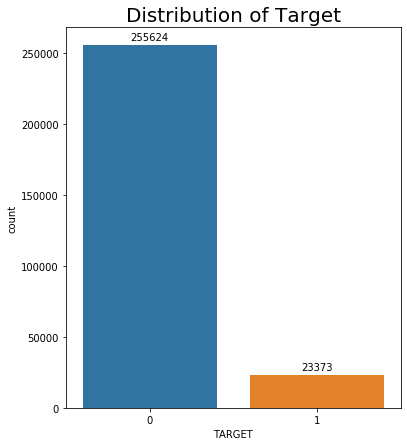

In [30]:
plt.figure(figsize=(6,7))
plt.title('Distribution of Target',fontsize=20)
ax=sns.countplot(application.TARGET)

# Annote with values.
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.tight_layout
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;"><b>Analysis</b> - There is a huge data imbalance in the 'TARGET' variable between the values '0' and '1'

#### Divide the dataframe based on the Target values.

In [31]:
#Dividing application data based on 'Target'
target0=application.loc[application['TARGET']==0]
target1=application.loc[application['TARGET']==1]

### Performing analysis on the data.

<p style="font-family: Arial; font-size:1.0em;color:Green;"><b>1. Univariate Analysis:</b><br>(a)Categorical Variables<br>(b)Numerical Variables<br><br><b>2. Bivariate Analysis:</b><br>(a)Numerical and Categorical Variables<br>(b)Numerical Variables

<font color='Blue'><h2><center>Univariate Analysis: Target '0'</center></h2></font>

### Categorical Variables

<p style="font-family: Arial; font-size:1.0em;color:Green;">First we create a dataframe which has only the categorical features in the original dataframe using <b>numpy.object</b> method.<br>Later we will run a loop to plot the graph for every categorical column, instead of plotting the graph for each categorical variable.

In [32]:
#Creating data frames with only categorical variables
app_cat0=target0.loc[:,target0.dtypes==np.object] #Categorical variables based on object datatype with target '0'
app_cat1=target1.loc[:,target1.dtypes==np.object] #Categorical variables based on object datatype with target '1'

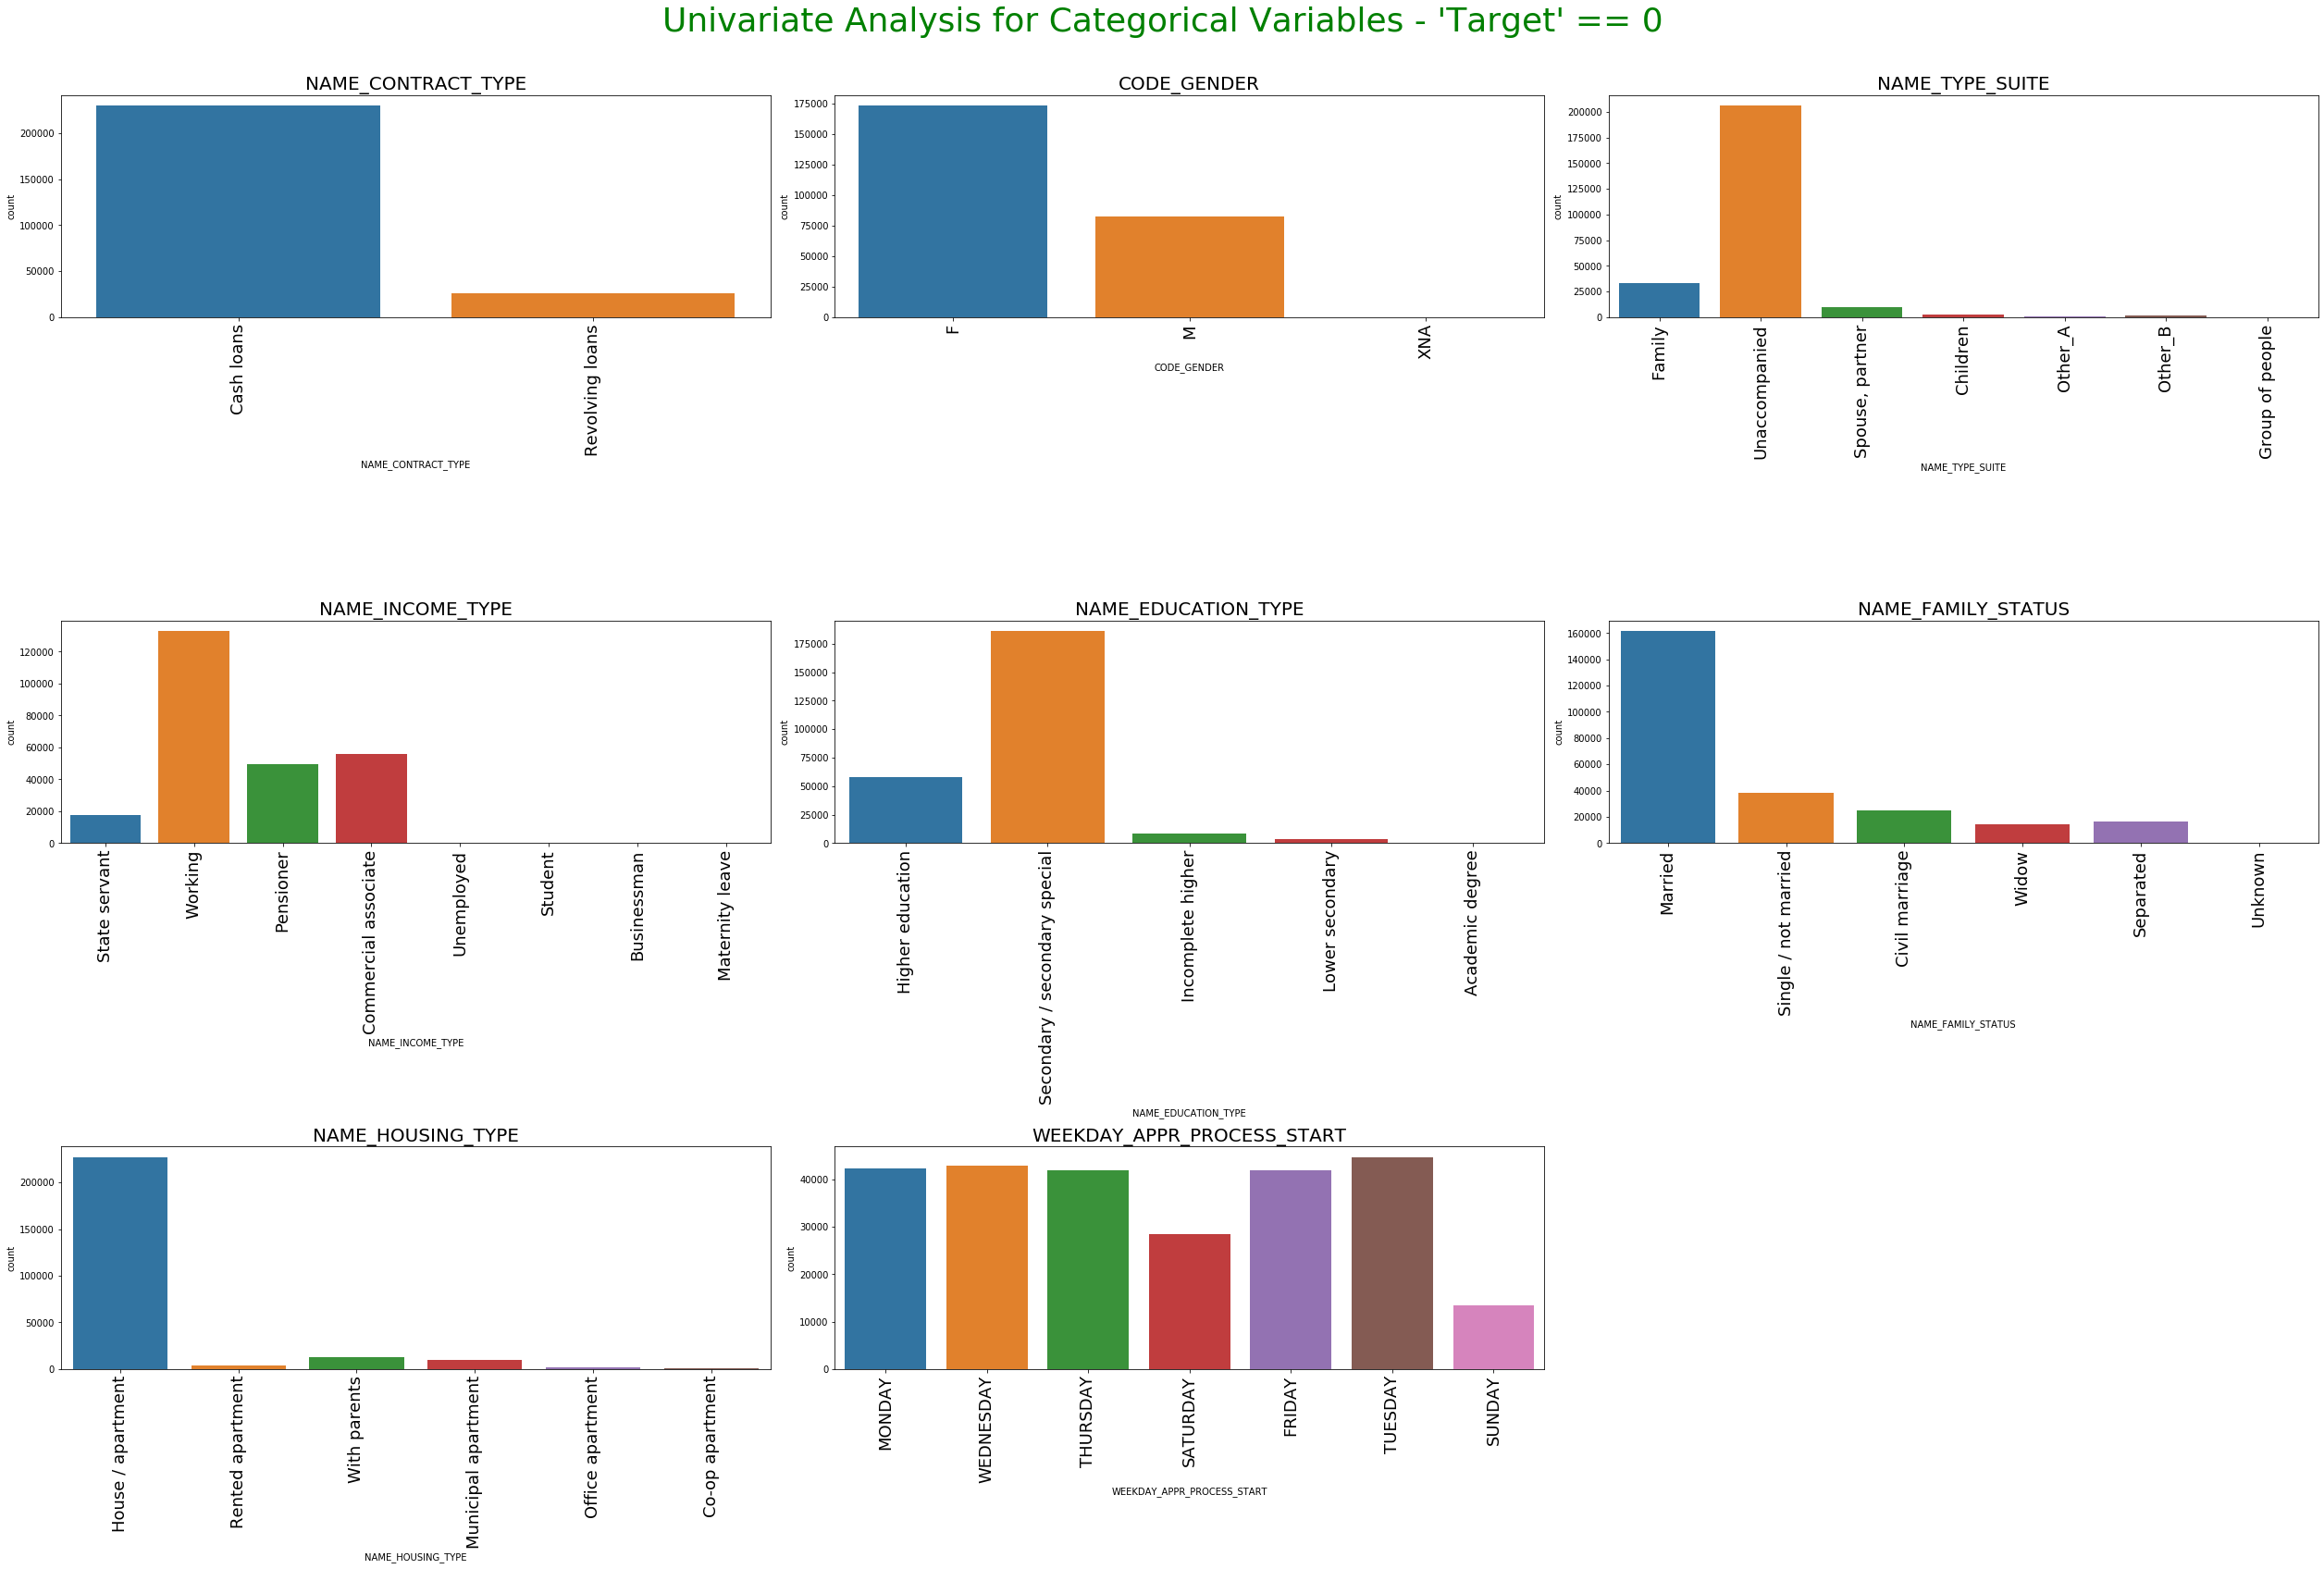

In [33]:
appcat=[]
for i in app_cat0.columns:
    appcat.append(i)
j=1
plt.figure(figsize=(35,30))
for i in appcat:
    plt.subplot(4,3,j)
    sns.countplot(i,data=app_cat0)
    plt.title(i,fontsize=20)
    plt.xticks(rotation=90,fontsize=18)
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Categorical Variables - \'Target\' == 0',fontsize=36, color='Green')
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;">The above plot depicts how each category is distributed among its subcategories for <b>Target 0</b>. Few observations depicted from the above graphs are mentioned below.<br> 1. Customers have applied for more Cash loans when compared to revolving loans<br>2. Female customers are more in number than that of Male customers.<br>3. Most of the customers are unaccompanied while applying for the loan.<br>4. Based on the Income type, Working professionals are more in number when compared to the other subcategories.<br>5. Most of the customers fall under the category of secondary education <br>6. Most of the clients are married.<br>7. Many of them live in their houses/apartments. <br>8.  Most of the clients applied Loan on Tuesday. 

### Numerical Variables

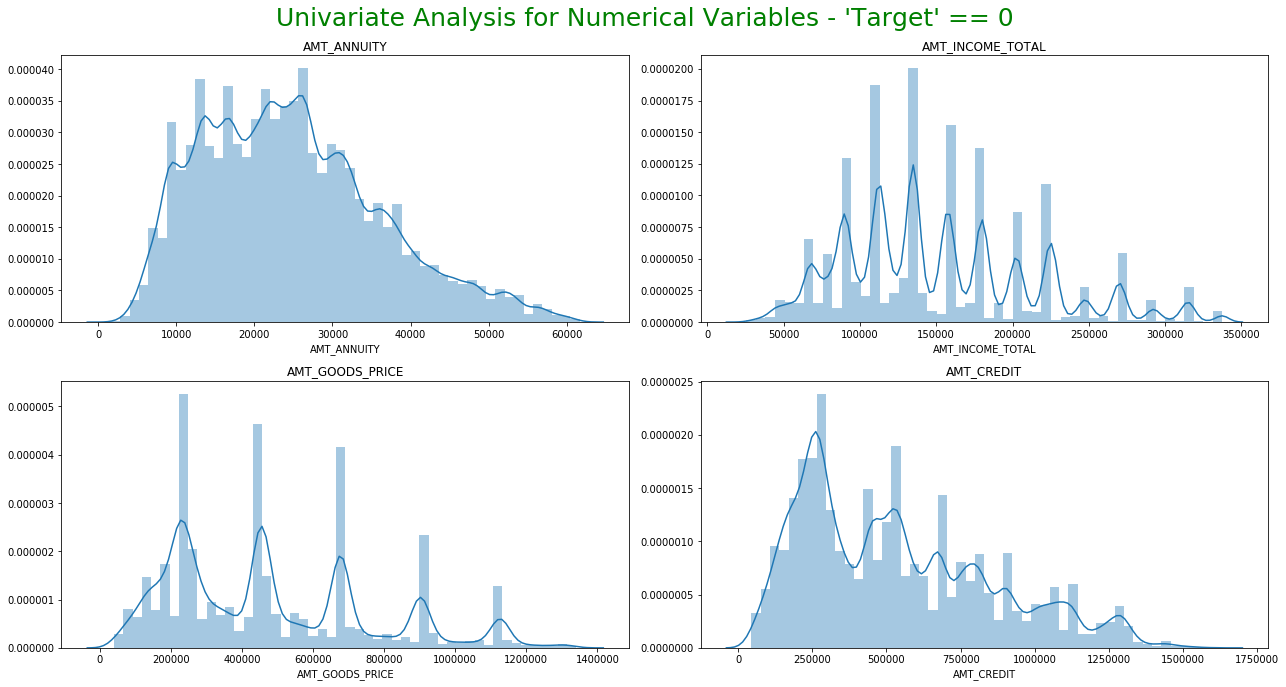

In [34]:
col=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_CREDIT']
j=1
target0.dropna(subset=col,inplace=True)
plt.figure(figsize=(18,10))
for i in col:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(target0[i])
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables - \'Target\' == 0',fontsize=25,color='Green')
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;"><b>Analysis</b> -<br>
    1. High values of 'AMT_ANNUITY' are concentrated between 10000 - 30000<br>
    2. High values of 'AMT_INCOME_TOTAL' are concentrated between 120000 - 150000 approx<br>
    3. Highest value of 'AMT_GOODS_PRICE' is found between 200000-300000<br>
    4. Decreasing trend is observed in 'AMT_CREDIT' attibute.

<font color='Blue'><h2><center>Bivariate Analysis: Target '0'</center></h2></font>

### Correlation

<p style="font-family: Arial; font-size:1.0em;color:Green;">Correlating the continous numerical columns in the dataframe gives  insights among the features. <br>For any two features x and y, Correlation is positive, when the value of y increases along with increase in x value, and here the coorelation coefficient lies between 0 and 1<br>Correlation is negative when we see that on increase of x value there is a decrease in y value and vice versa, in such case the correlation coefficient lies between -1 and 0.

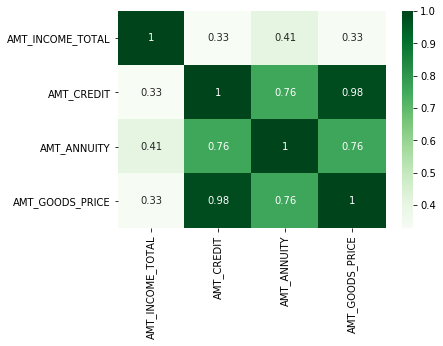

In [35]:
#Let's draw a heatmap for the numerical attributes to check correlation among them
z=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
fig=sns.heatmap(target0[z].corr(),annot=True,cmap='Greens')
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;"><b>Analysis</b><br>The above heatmap clearly depicts that the correlation between AMT_GOODS_PRICE and AMT_CREDIT is 0.98 which means that both the attributes are following a very good linear relationship.<br>Similarly, from the heatmap, the correlated coefficients for other feature combinations are listed below:<br>1. AMT_CREDIT and AMT_GOODS_PRICE -    0.98<br>2. AMT_CREDIT and AMT_ANNUITY -    0.76<br>3. AMT_ANNUITY and AMT_GOODS_PRICE -   0.76<br>4. AMT_ANNUITY and AMT_INCOME_TOTAL -   0.41<br>5. AMT_INCOME_TOTAL and AMT_GOODS_PRICE -    0.33<br>6. AMT_INCOME_TOTAL and AMT_CREDIT -   0.33<br>
"All of these correlation coefficients lies between 0-1 and hence the correlation is positive"<br>
    <b>Top Correlation is between AMT_CREDIT and AMT_GOODS_PRICE which is 0.98</b>

<p style="font-family: Arial; font-size:1.0em;color:Green;">So, we consider the below features as the 4 most important features.<br>1. AMT_CREDIT<br>2. AMT_GOODS_PRICE<br>3. AMT_ANNUITY <br>4. AMT_INCOME_TOTAL<br>

### Top 10 corelated variables w.r.t Target 0

In [36]:
corr = target0.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['Column1', 'Column2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


,Column1,Column2,Correlation
1114,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
214,AMT_GOODS_PRICE,AMT_CREDIT,0.98
719,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
632,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
863,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
1150,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
971,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
215,AMT_GOODS_PRICE,AMT_ANNUITY,0.76
179,AMT_ANNUITY,AMT_CREDIT,0.76
463,FLAG_EMP_PHONE,DAYS_BIRTH,0.63


### Numerical and Categorical Variables

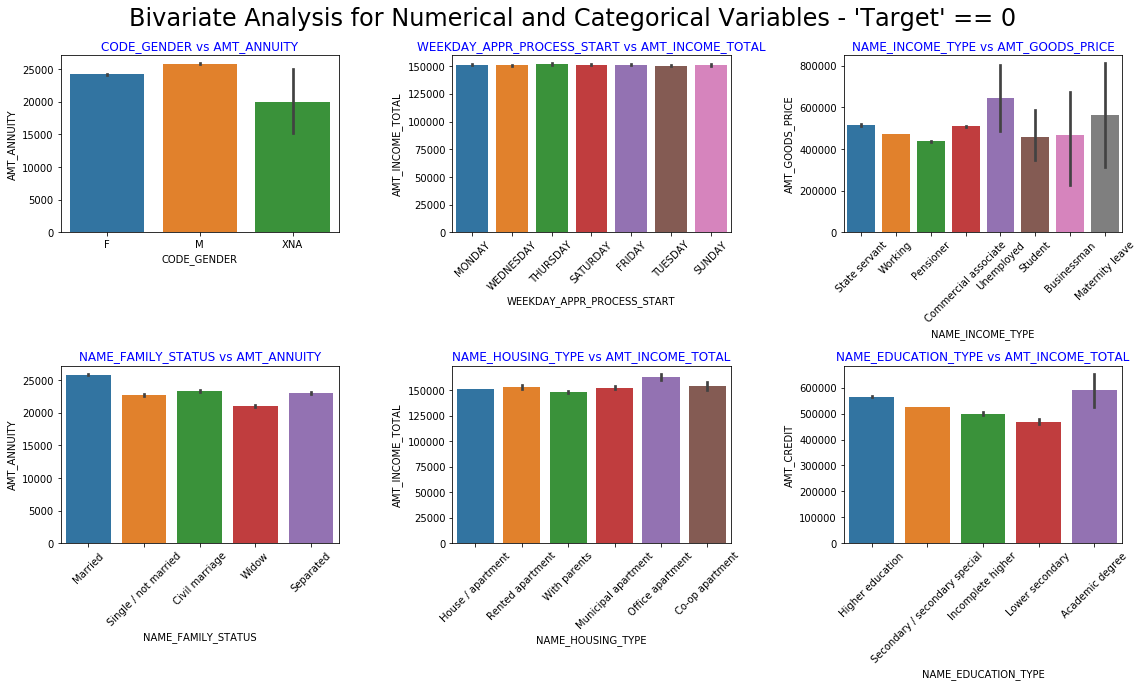

In [37]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.title('CODE_GENDER vs AMT_ANNUITY',fontsize=12,color='Blue')
sns.barplot(y='AMT_ANNUITY',x='CODE_GENDER', data=target0)
plt.subplot(232)
plt.title('WEEKDAY_APPR_PROCESS_START vs AMT_INCOME_TOTAL',fontsize=12,color='Blue')
sns.barplot(y='AMT_INCOME_TOTAL',x='WEEKDAY_APPR_PROCESS_START', data=target0)
plt.xticks(rotation=45)
plt.subplot(233)
plt.title('NAME_INCOME_TYPE vs AMT_GOODS_PRICE',fontsize=12,color='Blue')
sns.barplot(y='AMT_GOODS_PRICE',x='NAME_INCOME_TYPE', data=target0)
plt.xticks(rotation=45)
plt.subplot(234)
plt.title('NAME_FAMILY_STATUS vs AMT_ANNUITY',fontsize=12,color='Blue')
sns.barplot(y='AMT_ANNUITY',x='NAME_FAMILY_STATUS', data=target0)
plt.xticks(rotation=45)
plt.subplot(235)
plt.title('NAME_HOUSING_TYPE vs AMT_INCOME_TOTAL',fontsize=12,color='Blue')
sns.barplot(y='AMT_INCOME_TOTAL',x='NAME_HOUSING_TYPE', data=target0)
plt.xticks(rotation=45)
plt.subplot(236)
plt.title('NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL',fontsize=12,color='Blue')
sns.barplot(y='AMT_CREDIT',x='NAME_EDUCATION_TYPE', data=target0)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical and Categorical Variables - \'Target\' == 0',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;">The above plot shows how the categorical features are distributed with the numerical variables. The below analysis are limited omly for target variable 0<br>
1. The average loan annuity  is higher for males when compared to other genders.<br>
2. The average loan annuity  is higher for Married people when compared to people of other family status.<br>
3. The average price of the goods for which the loan is given is highest for unemployed people.<br>
4. The income of the clients with a housing situation of office apartment is more when compared to others.<br>
5. Clients with academic degree are having more income amount compared to others

### Numerical Variables

<p style="font-family: Arial; font-size:1.0em;color:Green;">As the dataset contains enormous amount of data, plotting all the points will make the plot more complex and chaotic. So, we are considering a set of 150 points for the below bivariate analysis.

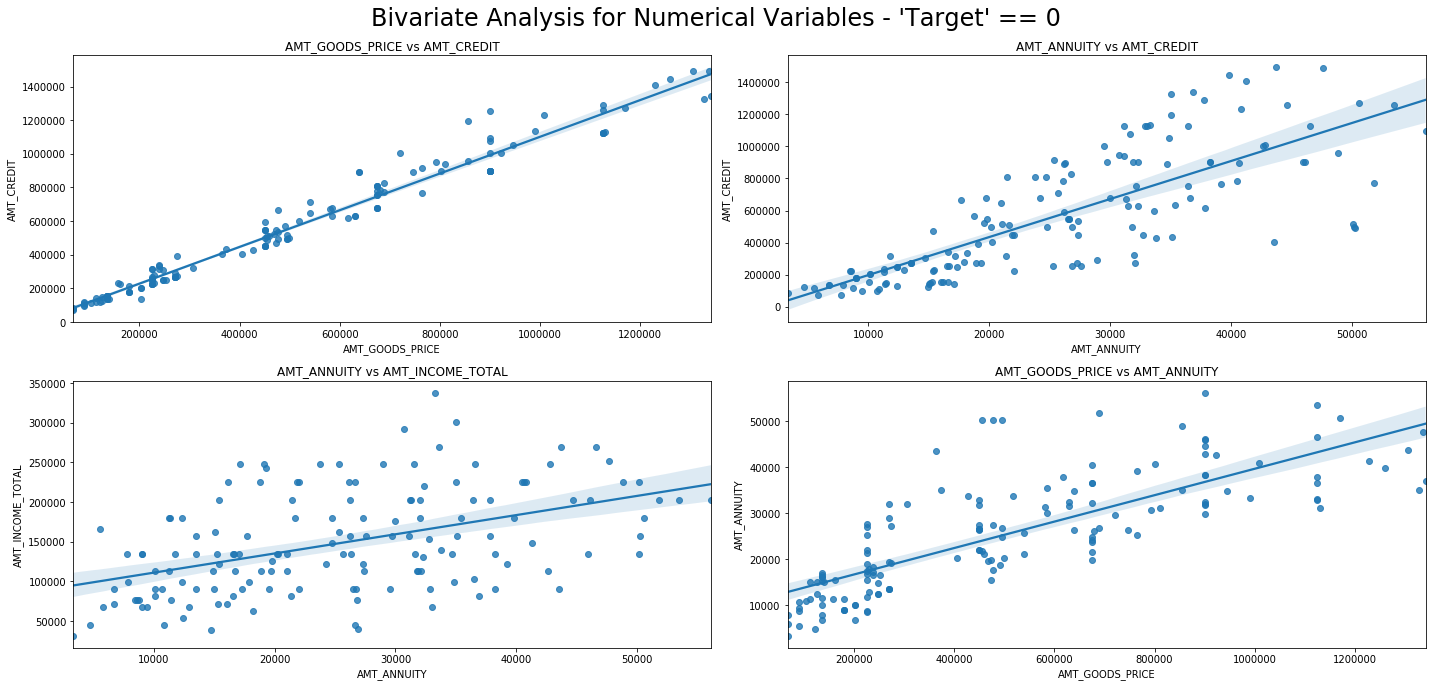

In [38]:
x=target0.sample(150)
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT',fontsize=12)
sns.regplot(y='AMT_CREDIT',x='AMT_GOODS_PRICE', data=x)
plt.subplot(222)
plt.title('AMT_ANNUITY vs AMT_CREDIT',fontsize=12)
sns.regplot(y='AMT_CREDIT',x='AMT_ANNUITY', data=x)
plt.subplot(223)
plt.title('AMT_ANNUITY vs AMT_INCOME_TOTAL',fontsize=12)
sns.regplot(y='AMT_INCOME_TOTAL',x='AMT_ANNUITY', data=x)
plt.subplot(224)
plt.title('AMT_GOODS_PRICE vs AMT_ANNUITY',fontsize=12)
sns.regplot(y='AMT_ANNUITY',x='AMT_GOODS_PRICE', data=x)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical Variables - \'Target\' == 0',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;">Depending on the correlation coefficient, the graphs are distributed as above. The best fit line describes the relationship between the attributes more precisely.<br>As the correlation between goods price and Credit amount is 0.98 which is very close to 1, here in the above graph we can see the linear relationship between the two attributes very clearly compared to other cases.

<font color='Blue'><h2><center>Univariate Analysis: Target '1'</center></h2></font>

### Categorical Variables

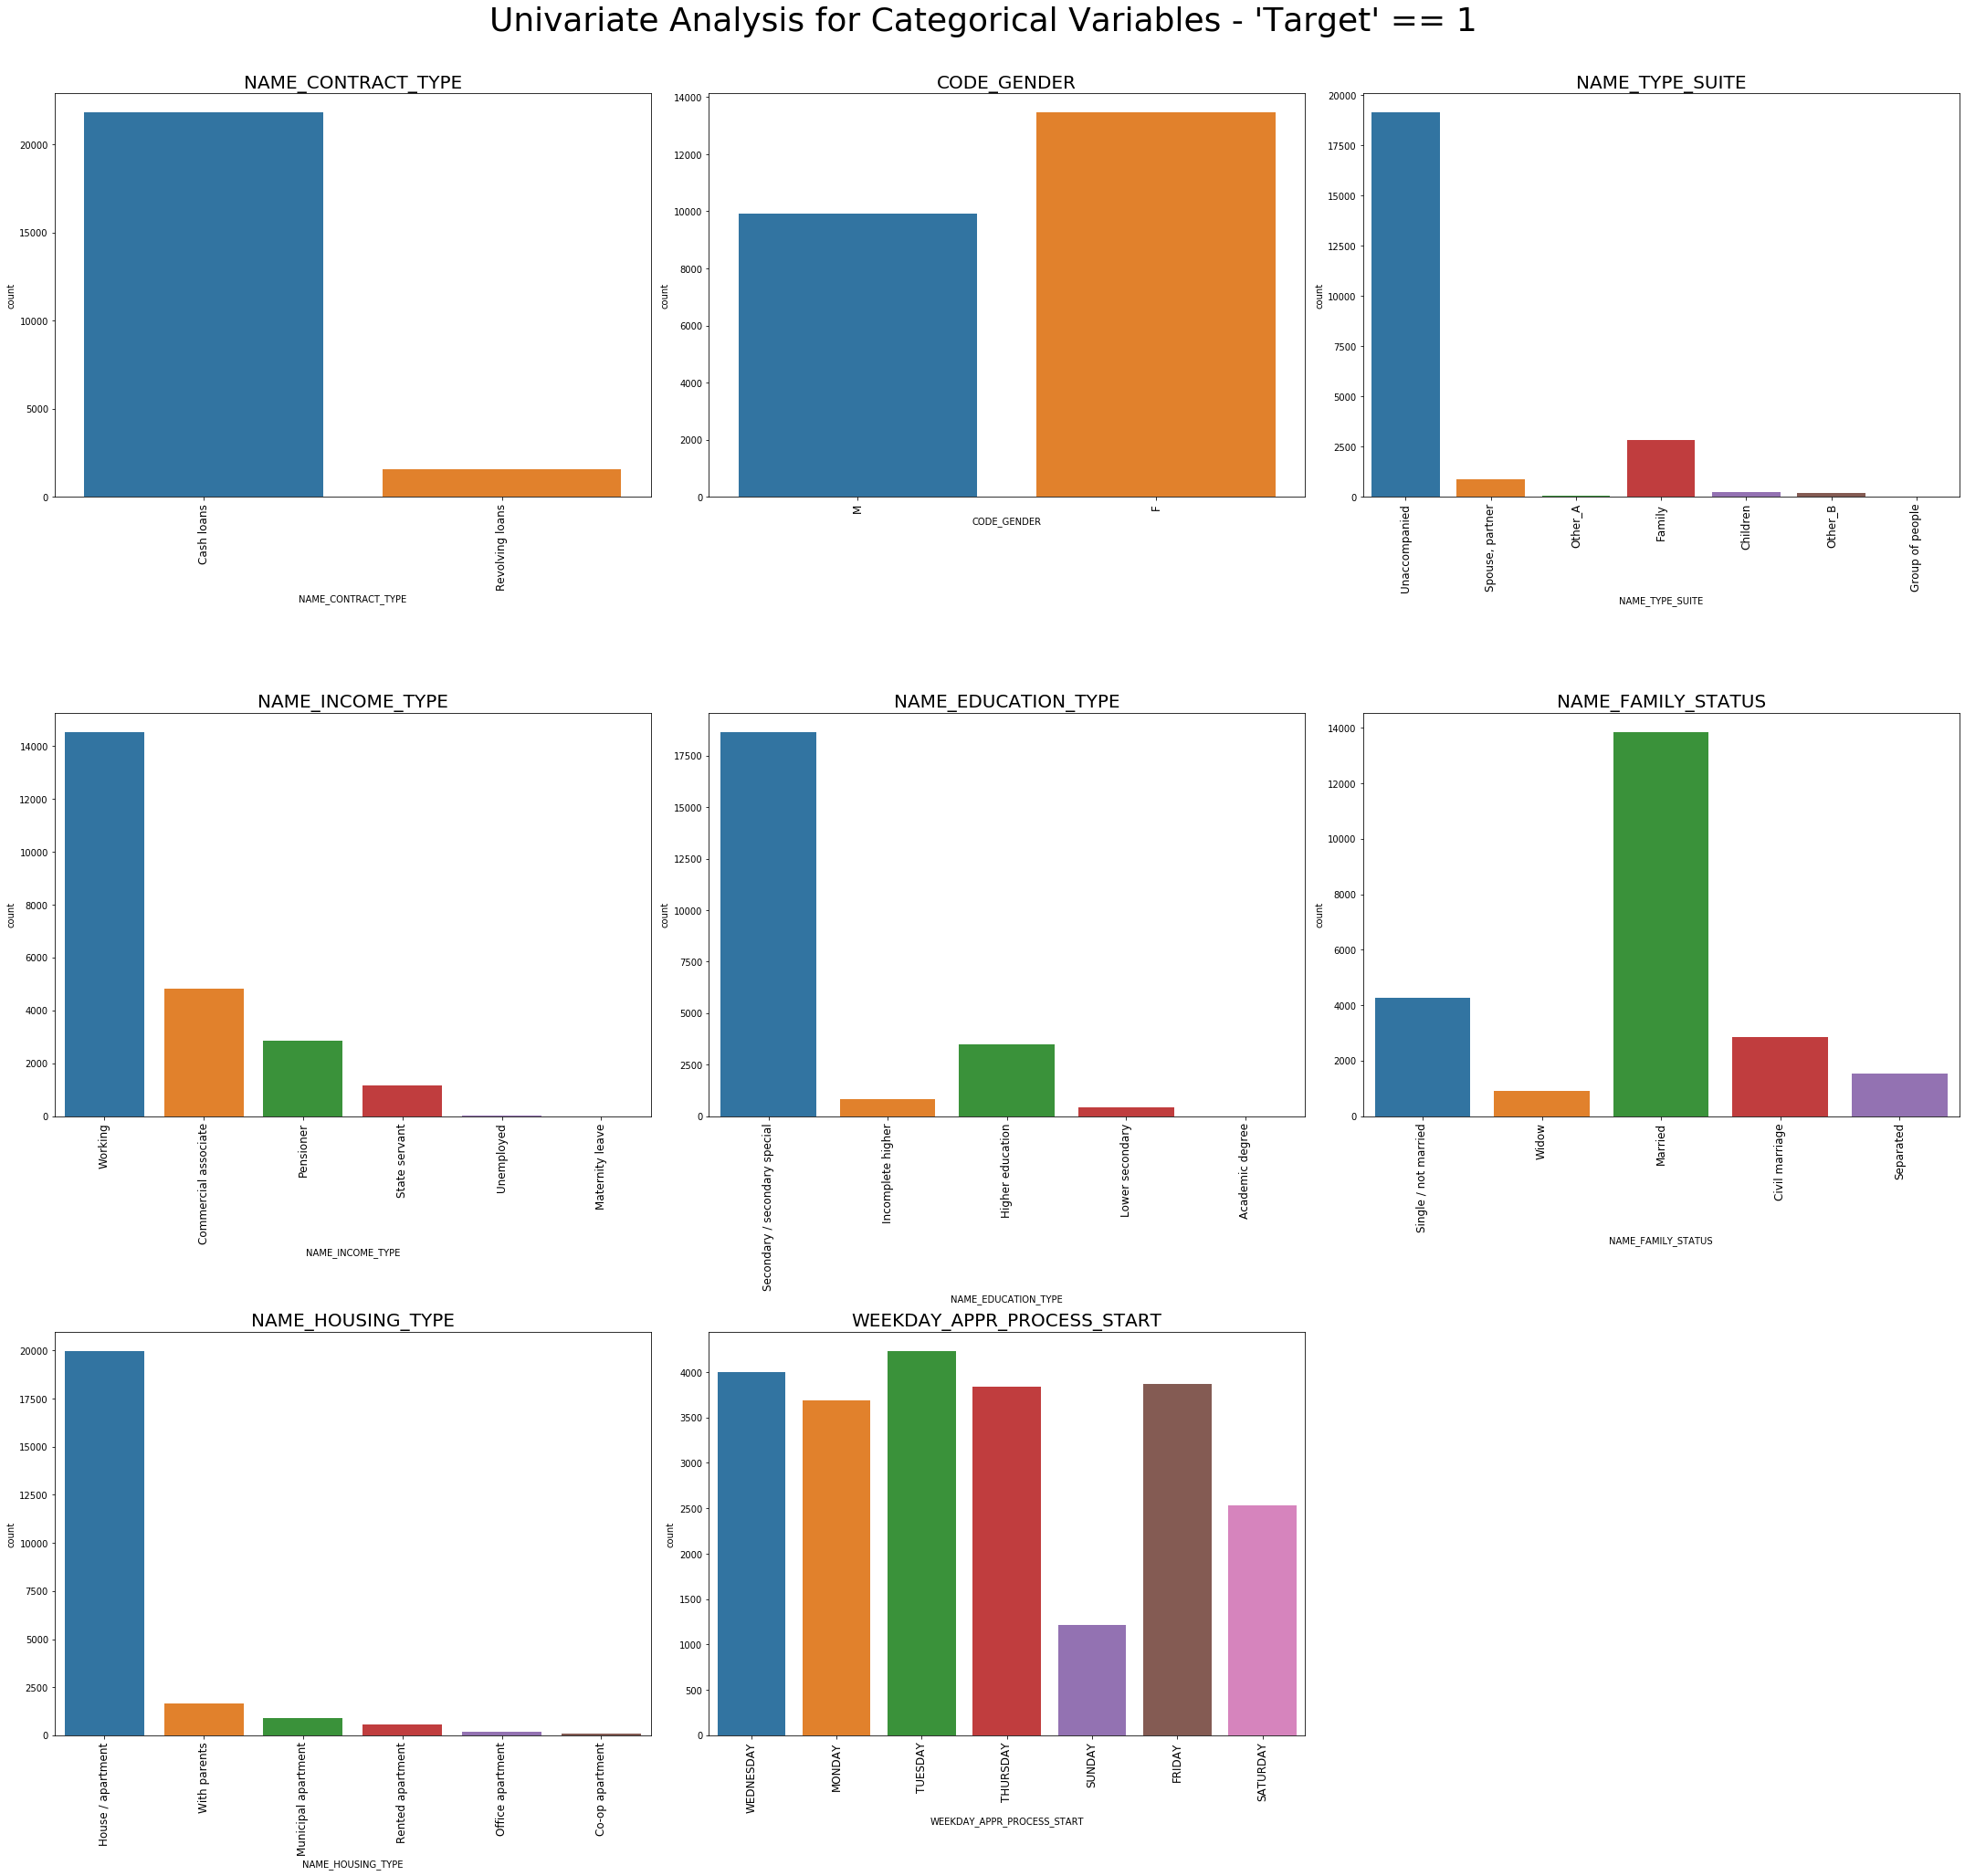

In [39]:
appcat=[]
for i in app_cat0.columns:
    appcat.append(i)
j=1
plt.figure(figsize=(30,30))
for i in appcat:
    plt.subplot(3,3,j)
    plt.title(i,fontsize=20)
    sns.countplot(i,data=app_cat1)
    plt.xticks(rotation=90,fontsize=12)
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Categorical Variables - \'Target\' == 1',fontsize=36)
plt.show()


<p style="font-family: Arial; font-size:1.0em;color:Green;"> Below inferences are made from the graphs plotted above which are limited to the customers with payment difficulties corresponding to Target 1 only:<br>
    1. Customers are applied for more Cash loans than Revolving loans. <br>
    2. Female customers are more in number compared to Male.<br>
    3. Most of the customers are unaccompanied while applying for the loan.<br>
    4. Most of the people who are having payment difficulties are working professionals. <br>
    5. Married couples are facing more payment difficulties when compared to people of other family statuses.<br>
    6. Here, most of the customers fall under the category of secondary education<br>
    7. The housing situation of the people with payment difficulties is House / apartment in majority<br>
    8. Many of them applied loan on Tuesday compared to any other day. 

### Numerical Variables

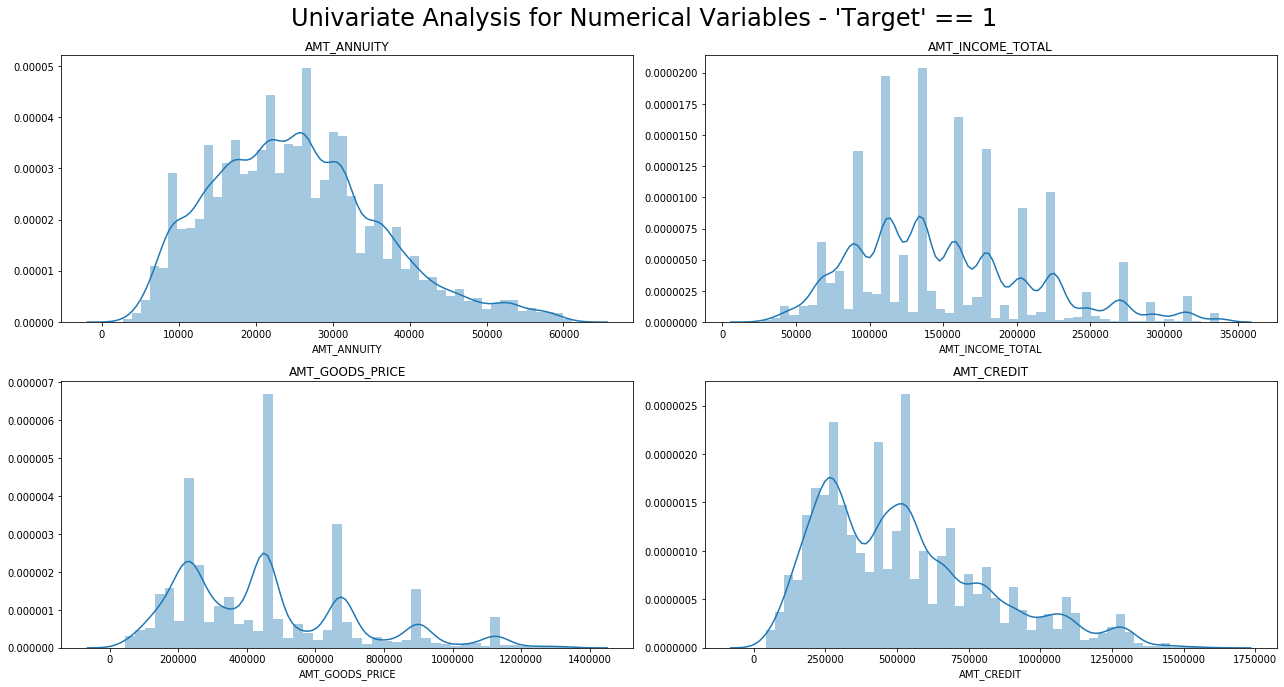

In [40]:
col=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_CREDIT']
j=1
target1.dropna(subset=col,inplace=True)
plt.figure(figsize=(18,10))
for i in col:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(target1[i])
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables - \'Target\' == 1',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;">Analysis -<br>
    1. High values of 'AMT_ANNUITY' are concentrated between 20000 - 30000<br>
    2. High values of 'AMT_INCOME_TOTAL' are approximately concentrated between 120000 - 150000<br>
    3. Decreasing trend is seen in 'AMT_CREDIT'.

<font color='Blue'><h2><center>Bivariate Analysis: Target '1'</center></h2></font>

### Correlation

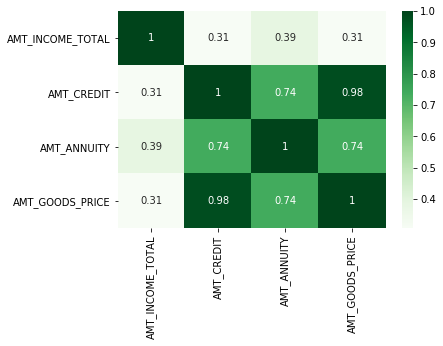

In [41]:
ax=sns.heatmap(target1[z].corr(),annot=True,cmap='Greens')
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;">From the above heatmap, we can determine that the correlation between AMT_GOODS_PRICE and AMT_CREDIT is 0.98 which depicts that both of these features are having a very good linear relationship.<br>Similarly, from the heatmap, below are the features which have correlated nicely.<br>1. AMT_CREDIT and AMT_GOODS_PRICE -    0.98<br>2. AMT_CREDIT and AMT_ANNUITY -    0.74<br>3. AMT_ANNUITY and AMT_GOODS_PRICE -   0.74<br>4. AMT_ANNUITY and AMT_INCOME_TOTAL -   0.39<br>5. AMT_INCOME_TOTAL and AMT_GOODS_PRICE -    0.31<br>6. AMT_INCOME_TOTAL and AMT_CREDIT -   0.31<br>
    <b> Top correlation is found between AMT_GOODS_PRICE and AMT_CREDIT which is 0.98</b>

<p style="font-family: Arial; font-size:1.0em;color:Green;">So, we consider the below features as the 4 most important features.<br>1. AMT_CREDIT<br>2. AMT_GOODS_PRICE<br>3. AMT_ANNUITY <br>4. AMT_INCOME_TOTAL<br>

### Top 10 correlated Variables w.r.t Target 1(Client with payment difficulties)

In [42]:
corr = target1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['Column1', 'Column2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


,Column1,Column2,Correlation
1114,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
214,AMT_GOODS_PRICE,AMT_CREDIT,0.98
719,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
632,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1150,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
863,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
971,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
179,AMT_ANNUITY,AMT_CREDIT,0.74
215,AMT_GOODS_PRICE,AMT_ANNUITY,0.74
463,FLAG_EMP_PHONE,DAYS_BIRTH,0.59


### Categorical and Numerical Variables

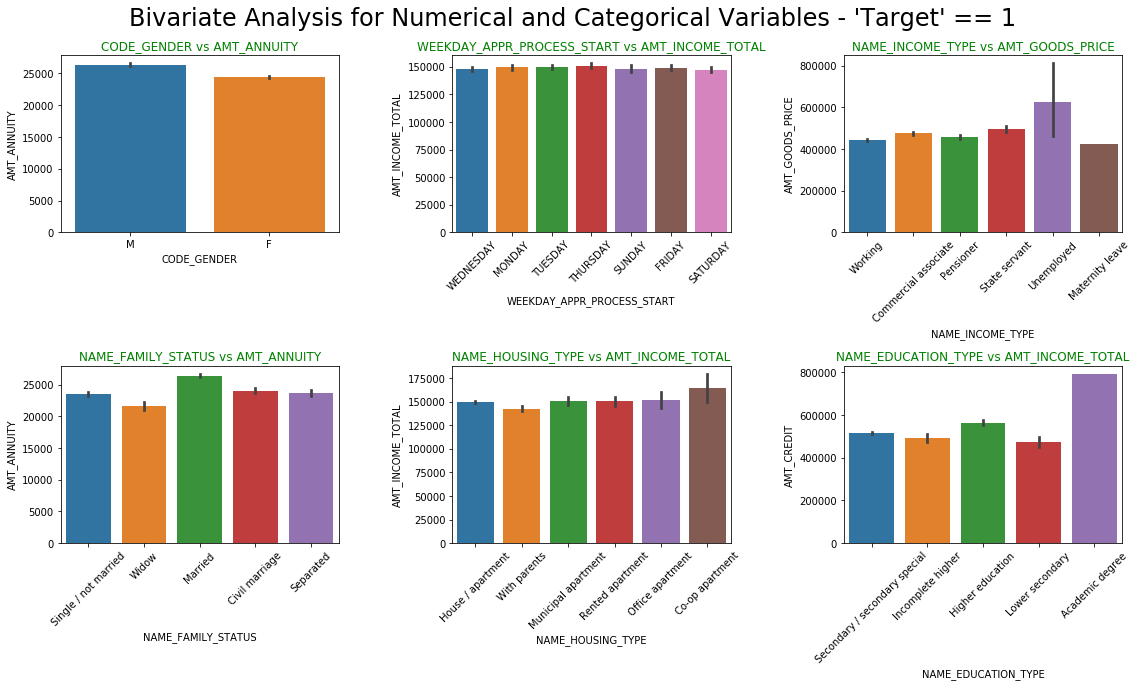

In [43]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.title('CODE_GENDER vs AMT_ANNUITY',fontsize=12,color='Green')
sns.barplot(y='AMT_ANNUITY',x='CODE_GENDER', data=target1)
plt.subplot(232)
plt.title('WEEKDAY_APPR_PROCESS_START vs AMT_INCOME_TOTAL',fontsize=12,color='Green')
sns.barplot(y='AMT_INCOME_TOTAL',x='WEEKDAY_APPR_PROCESS_START', data=target1)
plt.xticks(rotation=45)
plt.subplot(233)
plt.title('NAME_INCOME_TYPE vs AMT_GOODS_PRICE',fontsize=12,color='Green')
sns.barplot(y='AMT_GOODS_PRICE',x='NAME_INCOME_TYPE', data=target1)
plt.xticks(rotation=45)
plt.subplot(234)
plt.title('NAME_FAMILY_STATUS vs AMT_ANNUITY',fontsize=12,color='Green')
sns.barplot(y='AMT_ANNUITY',x='NAME_FAMILY_STATUS', data=target1)
plt.xticks(rotation=45)
plt.subplot(235)
plt.title('NAME_HOUSING_TYPE vs AMT_INCOME_TOTAL',fontsize=12,color='Green')
sns.barplot(y='AMT_INCOME_TOTAL',x='NAME_HOUSING_TYPE', data=target1)
plt.xticks(rotation=45)
plt.subplot(236)
plt.title('NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL',fontsize=12,color='Green')
sns.barplot(y='AMT_CREDIT',x='NAME_EDUCATION_TYPE', data=target1)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical and Categorical Variables - \'Target\' == 1',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:green;">The above plot shows how the categorical features are distributed with the numerical variables. The below points are limited only for target variable 1<br>
1. The average loan annuity is higher for males when compared to other genders.<br> 
2. The average price of the goods for which the loan is given is highest for unemployed people.<br>
3. The average loan annuity is higher for Married people when compared to others.<br>
4. People with housing type Co-op apartment has the highest income compared to other housing types<br>
5. Income amount is more in case of people with Academic degree. 

### Numerical Variables

<p style="font-family: Arial; font-size:1.0em;color:Green;">As the dataset contains enormous amount of data, lets plot with a set of 150 points for the below bivariate analysis like we did earlier.

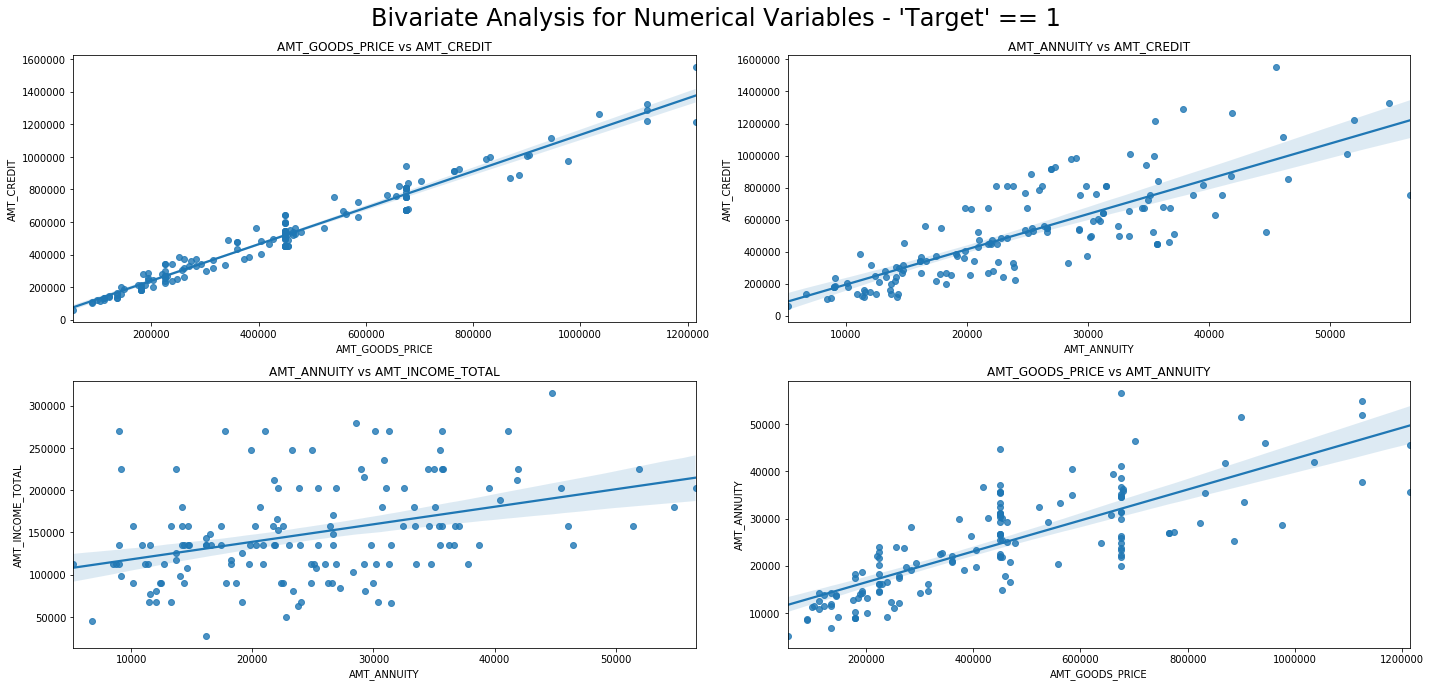

In [44]:
x=target1.sample(150)
fig=plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT',fontsize=12)
sns.regplot(y='AMT_CREDIT',x='AMT_GOODS_PRICE', data=x)
plt.subplot(222)
plt.title('AMT_ANNUITY vs AMT_CREDIT',fontsize=12)
sns.regplot(y='AMT_CREDIT',x='AMT_ANNUITY', data=x)
plt.subplot(223)
plt.title('AMT_ANNUITY vs AMT_INCOME_TOTAL',fontsize=12)
sns.regplot(y='AMT_INCOME_TOTAL',x='AMT_ANNUITY', data=x)
plt.subplot(224)
plt.title('AMT_GOODS_PRICE vs AMT_ANNUITY',fontsize=12)
sns.regplot(y='AMT_ANNUITY',x='AMT_GOODS_PRICE', data=x)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical Variables - \'Target\' == 1',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:Green;">Depending on the correlation coefficient, the graphs are distributed as above. The best fit line describes the relationship between the attributes more precisely.<br>As the correlation between goods price and credit amount is 0.98 which is very close to 1, here in the above graph we can see the linear relationship between the two attributes very clearly compared to other cases.

<p style="font-family: Arial; font-size:1.0em;color:Green;">From the above analysis, we consider the below columns as the most important features which effect the Target variables.<br>
1. NAME_INCOME_TYPE<br>2. NAME_HOUSING_TYPE
    <br>3. NAME_EDUCATION_TYPE<br>4. NAME_FAMILY_STATUS<br>5. AMT_CREDIT<br>6. AMT_GOODS_PRICE<br>7. AMT_ANNUITY<br>8. AMT_INCOME_TOTAL

In [45]:
application_final=application[['SK_ID_CURR','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL','TARGET']]

<p style="font-family: Arial; font-size:1.0em;color:Green;">We also considered the Target variable and the loan ID in the dataframe for further grouping analysis while merging with previous loan history dataframe.

In [46]:
application_final.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_INCOME_TOTAL,TARGET
0,100002,Working,House / apartment,Secondary / secondary special,Single / not married,406597.5,351000.0,24700.5,202500.0,1
1,100003,State servant,House / apartment,Higher education,Married,1293502.5,1129500.0,35698.5,270000.0,0
2,100004,Working,House / apartment,Secondary / secondary special,Single / not married,135000.0,135000.0,6750.0,67500.0,0
3,100006,Working,House / apartment,Secondary / secondary special,Civil marriage,312682.5,297000.0,29686.5,135000.0,0
4,100007,Working,House / apartment,Secondary / secondary special,Single / not married,513000.0,513000.0,21865.5,121500.0,0


## Data Understanding on Previous application data

### Let us examine the data set

In [47]:
# head of the dataframe.
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# tail of the dataframe.
previous.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [49]:
# Get the shape of the dataframe.
previous.shape

(1670214, 37)

In [50]:
# Summary statistics of the dataframe.
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [51]:
# Get the info of the dataframe.
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Data Cleaning 

<p style="font-family: Arial; font-size:1.0em;color:green;">Let's check the data quality and missing values treatment.

<p style="font-family: Arial; font-size:1.0em;color:Green;"><li>There are 3 ambiguous values in the dataset .They are XNA, XAP and 365243.</li>
<li>Now let us replace these values with null </li>
<li>XNA/XAP denote NA values and value 365243 denotes infinity in DAYS variables, hence we replace these values with 'NA'.</li></p>

In [52]:
# Replacing ambiguous values wth 'NA'.
previous.replace(365243,np.nan,inplace=True)
previous.replace('XAP',np.nan,inplace=True)
previous.replace('XNA',np.nan,inplace=True)

In [53]:
# Calculating the percentage of missing/null values
(previous.isnull().mean()*100).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.02
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE              37.56
CODE_REJECT_REASON             81.33
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.12
NAME_GOODS_CATEGORY            56.93
NAME_PORTFOLIO                 22.29
NAME_PRODUCT_TYPE              63.68
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

<p style="font-family: Arial; font-size:1.0em;color:Green;"> Dropping the columns with high percentage of Null values above 65%

In [54]:
previous.drop(columns=['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','DAYS_FIRST_DRAWING'], inplace=True)

<p style="font-family: Arial; font-size:1.0em;color:Green;">Below are the list of columns which are left after dropping the columns with high percentage Null values.

In [55]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [56]:
# Check the percentage of missing values for all the columns.
(previous.isnull().mean()*100).round(2).sort_values()

SK_ID_PREV                      0.00
SELLERPLACE_AREA                0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
CHANNEL_TYPE                    0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
SK_ID_CURR                      0.00
PRODUCT_COMBINATION             0.02
NAME_CONTRACT_TYPE              0.02
NAME_CLIENT_TYPE                0.12
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
NAME_PORTFOLIO                 22.29
AMT_GOODS_PRICE                23.08
NAME_YIELD_GROUP               30.97
NAME_PAYMENT_TYPE              37.56
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DUE                 42.73
DAYS_LAST_DUE_1ST_VERSION      45.92
NAME_TYPE_SUITE                49.12
NAME_SELLER_INDUSTRY           51.23
DAYS_LAST_DUE                  52.94
R

<p style="font-family: Arial; font-size:1.0em;color:Green;">Let us assume that we treat the columns with less than 13% of missing values.</p>

In [57]:
# Category count of 'PRODUCT_COMBINATION' column .
previous['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:green;"><b>Analysis</b> - We can impute the missing values with 'Cash' as it is the most common occuring value.<br>


`previous.loc[pd.isnull(previous['PRODUCT_COMBINATION']), ['PRODUCT_COMBINATION']] = "Cash"`

In [58]:
# Valuecount for 'NAME_CONTRACT_TYPE' column.
previous['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:green;"><b>Analysis</b> - As 'Cash loans' is the most common value ,we can replace the missing values with it.


`previous.loc[pd.isnull(previous['NAME_CONTRACT_TYPE']), ['NAME_CONTRACT_TYPE']] = "Cash loans"`

In [59]:
# Valuecount for 'NAME_CLIENT_TYPE' column.
previous['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:green;"><b>Analysis</b> -As 'Repeater' is the most common value ,we can replace the missing values with it.


`previous.loc[pd.isnull(previous['NAME_CLIENT_TYPE']), ['NAME_CLIENT_TYPE']] = "Repeater"`

### Checking datatypes of previous data set

In [60]:
# Check the datatypes of all the columns and change if required.
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670213 non-null  float64
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

<p style="font-family: Arial; font-size:1.0em;color:Green;"> <b>Observation:</b> The data type of all the columns looks appropriate.

In [61]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,35,Connectivity,12.0,middle,POS mobile with interest,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,-1,NaN,36.0,low_action,Cash X-Sell: low,-134.0,916.0,NaN,NaN,1.0
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,-1,NaN,12.0,high,Cash X-Sell: high,-271.0,59.0,NaN,NaN,1.0
3,2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,-1,NaN,12.0,middle,Cash X-Sell: middle,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


In [62]:
#Describing the data
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670213e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,1.670214e+06,1.670214e+06,1.297984e+06,956504.000000,903285.000000,785928.000000,771236.000000,997149.000000
mean,1.923089e+06,2.783571e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,-8.806797e+02,3.139511e+02,1.605408e+01,-1106.583027,-677.158175,-996.179128,-978.375222,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,7.790997e+02,7.127443e+03,1.456729e+01,790.703113,923.601152,752.703178,749.134297,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,-1.300000e+03,-1.000000e+00,6.000000e+00,-1676.000000,-1359.000000,-1566.000000,-1539.000000,0.000000
50%,1.923110e+06,2.787140e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,-5.810000e+02,3.000000e+00,1.200000e+01,-874.000000,-480.000000,-801.000000,-780.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,-2.800000e+02,8.200000e+01,2.400000e+01,-459.000000,-2.000000,-353.000000,-337.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,-2.000000,2389.000000,-2.000000,-2.000000,1.000000


In [63]:
# Count of unique values of columns in the data set
previous.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NAME_PRODUCT_TYPE                    2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_CLIENT_TYPE                     3
NAME_PAYMENT_TYPE                    3
NAME_CONTRACT_TYPE                   3
NAME_PORTFOLIO                       4
NAME_YIELD_GROUP                     4
NAME_CONTRACT_STATUS                 4
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
NAME_SELLER_INDUSTRY                10
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_GOODS_CATEGORY                 27
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2829
DAYS_LAST_DUE                     2872
DAYS_FIRST_DUE                    2891
DAYS_DECISION                     2922
DAYS_LAST_DUE_1ST_VERSION         4604
AMT_DOWN_PAYMENT                 29278
AMT_CREDIT               

### Finding outliers in the data set

<p style="font-family: Arial;font-size:1.0em;color:Green;">Let's analyze the following three columns- AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE and RATE_DOWN_PAYMENT.We will find whether the outliers are present in those columns.

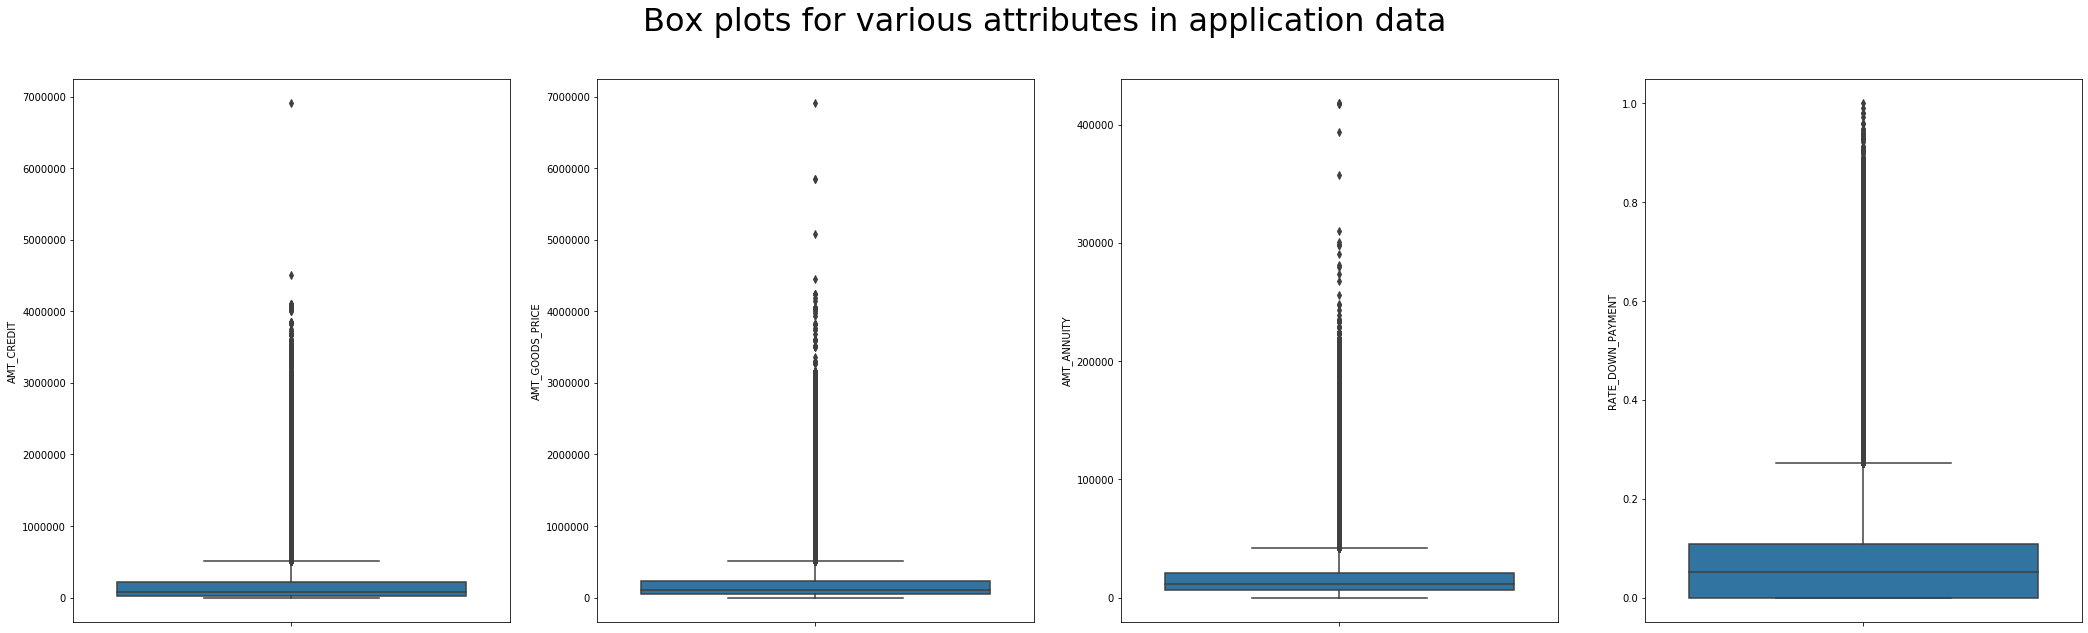

In [64]:
prev_columns_outliers=['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','RATE_DOWN_PAYMENT']
fig, axes = plt.subplots(1, len(prev_columns_outliers), figsize=(36,10))
for column, ax in zip(prev_columns_outliers,range(len(prev_columns_outliers))):
    ax=sns.boxplot(y=previous[column],ax=axes[ax])
plt.suptitle("Box plots for various attributes in application data",fontsize=32)
plt.show()

figure = ax.get_figure()    

<p style="font-family: Arial; font-size:1.0em;color:Green;">shape of the dataframe before deleting the outliers.

In [65]:
previous.shape

(1670214, 32)

<p style="font-family: Arial; font-size:1.0em;color:green;">We can see the outliers in the data.So, we pass the columns through the remove_outliers function where the outliers have to be removed.

In [66]:
previous=remove_outliers(previous,prev_columns_outliers)

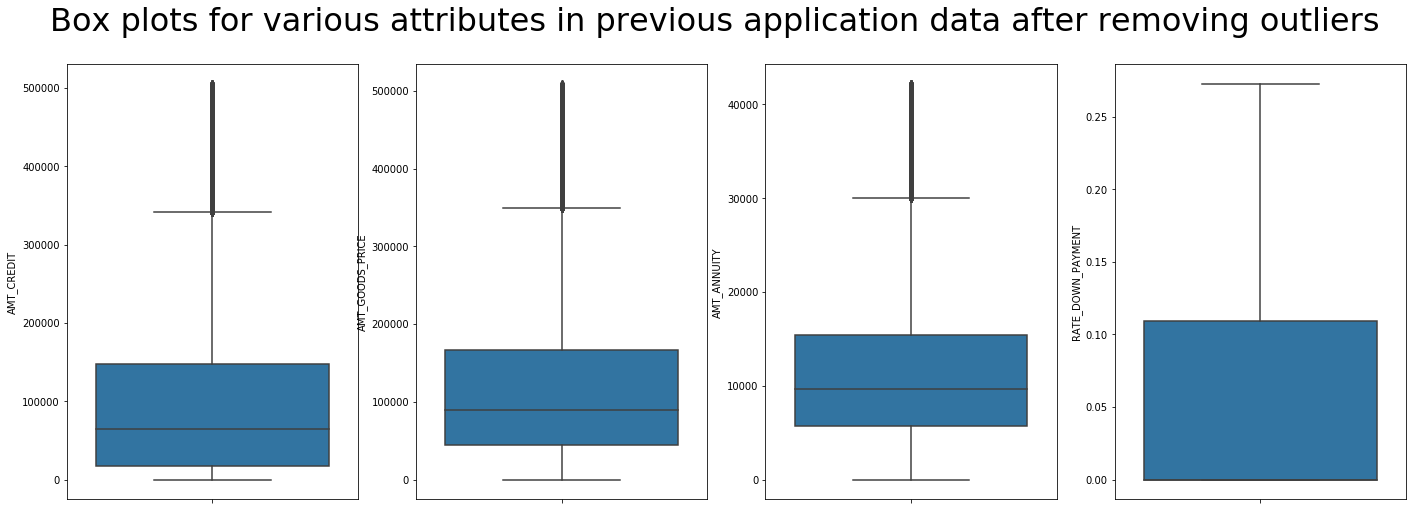

In [67]:
fig, axes = plt.subplots(1, len(prev_columns_outliers), figsize=(24,8))
for column, ax in zip(prev_columns_outliers,range(len(prev_columns_outliers))):
    sns.boxplot(y=previous[column],ax=axes[ax])
plt.suptitle("Box plots for various attributes in previous application data after removing outliers",fontsize=32)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:green;">shape of the dataframe after deleting the outliers.

In [68]:
previous.shape

(1432281, 32)

In [69]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

<font color='Tomato'><h2><center>Univariate Analysis: Previous Application Data</center></h2></font>

### Categorical Variables

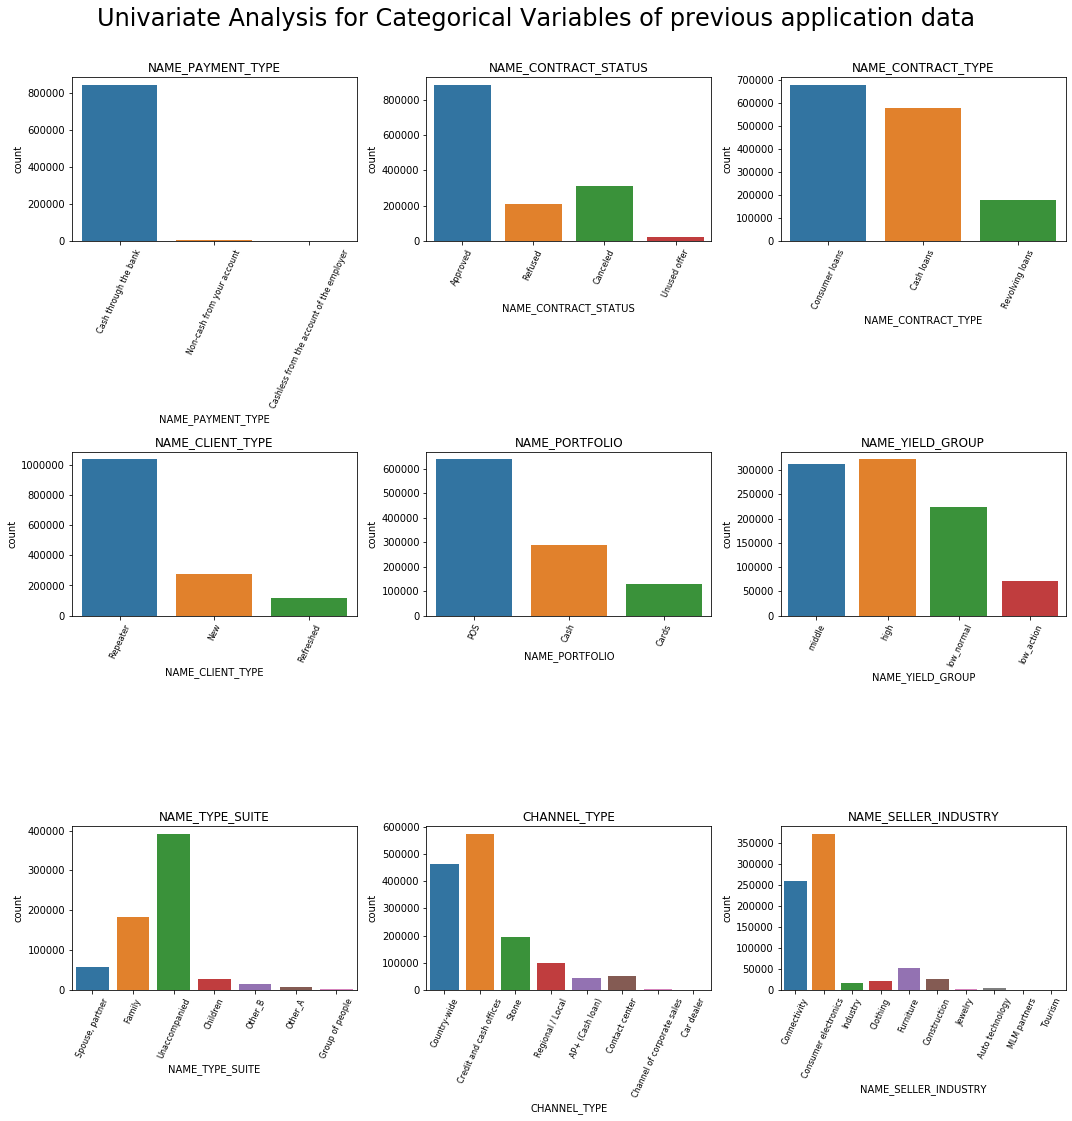

In [70]:
previous_categorical = ['NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','NAME_YIELD_GROUP','NAME_TYPE_SUITE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY']
j=1
plt.figure(figsize=(15,20))
for i in previous_categorical:
    plt.subplot(4,3,j)
    plt.title(i,fontsize=12)
    sns.countplot(i,data=previous)
    plt.xticks(rotation=65,fontsize=8)
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Categorical Variables of previous application data', fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:green;"><b>Analysis</b><br><li> We see that maximum of the loans were sanctioned for cash through the bank payment type.</li><li> Majority of the loans are approved with few rejected, unused and unused.</li><li> High number of Consumer loans were sanctioned by the bank than cash and revolving loans.</li><li> There were high number of repeater customers in the bank loan history.</li><li> The number of loans approved for POS is high when compared to cash and cards.</li><li> High number of loans were approved for high yield group followed by middle and low_normal.</li><li>Majority of the loans are approved for unaccompanied in NAME_TYPE_SUITE.</li><li> More loans were approved for credit and cash followed by country-wide in CHANNEL_TYPE.</li><li>We see that max loans were approved for consumer electronics type followed by connectivity in NAME_SELLER_INDUSTRY.</li></p>
										

### Numerical variables

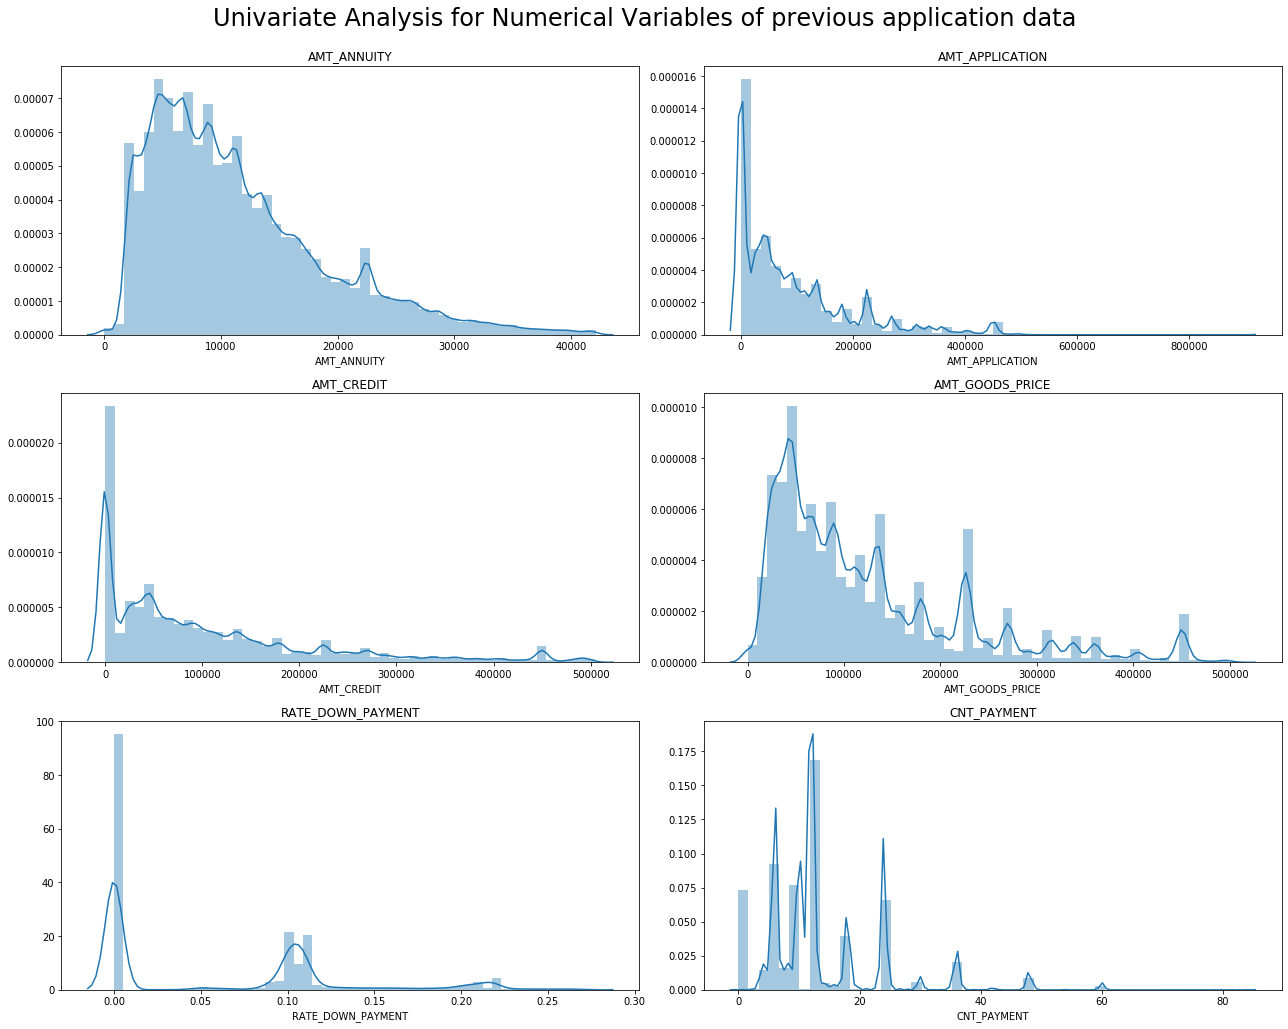

In [71]:
previous_numerical=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','RATE_DOWN_PAYMENT','CNT_PAYMENT']
plt.figure(figsize=(18,15))
j=1
for i in previous_numerical:
    plt.subplot(3,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(previous[i].dropna())
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables of previous application data',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:green;"><b>Analysis </b><br>
    1. High values of 'AMT_ANNUITY' and 'AMT_GOODS_PRICE' are concentrated below 10000<br>
    2. 'AMT_APPLICATION','AMT_CREDIT' and 'RATE_DOWN_PAYMENT' have higher amounts of '0' value<br>
    3. High Values of 'CNT_PAYMENT' is concentrated in the range of 10-20<br>

<font color='Green'><h2><center>Bivariate Analysis: Previous Application Data</center></h2></font>

### Correlation

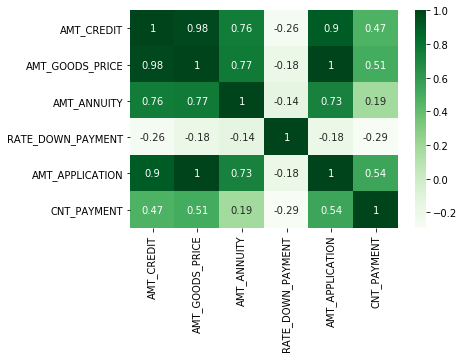

In [72]:
previous_numerical=['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','RATE_DOWN_PAYMENT','AMT_APPLICATION','CNT_PAYMENT']
sns.heatmap(previous[previous_numerical].corr(),annot=True,cmap='Greens')
plt.show()


<p style="font-family: Arial; font-size:1.0em;color:green;">From the above heatmap,the correlation between AMT_GOODS_PRICE and AMT_CREDIT is 0.98 which shows a very good linear relationship.<br>
Similarly, below the observations from the plot:<br>
1. AMT_GOODS_PRICE and AMT_CREDIT - 0.98<br>
2. AMT_CREDIT and AMT_APPLICATION - 0.9<br>
3. AMT_GOODS_PRICE and AMT_ANNUITY - 0.77<br>
4. AMT_CREDIT and AMT_ANNUITY - 0.76<br>
5. AMT_ANNUITY and AMT_APPLICATION - 0.73<br>
6. CNT_PAYMENT and AMT_APPLICATION - 0.54<br>
7. RATE_DOWN_PAYMENT is having negative correlation with other variables.

<p style="font-family: Arial; font-size:1.0em;color:green;">Therefore, we consider the below as the important numerical features that effect previousloan history dataframe.<br>1. AMT_ANNUITY<br>2. AMT_GOODS_PRICE<br>3. AMT_APPLICATION<br>4. AMT_CREDIT

### Numerical and categorical variables.

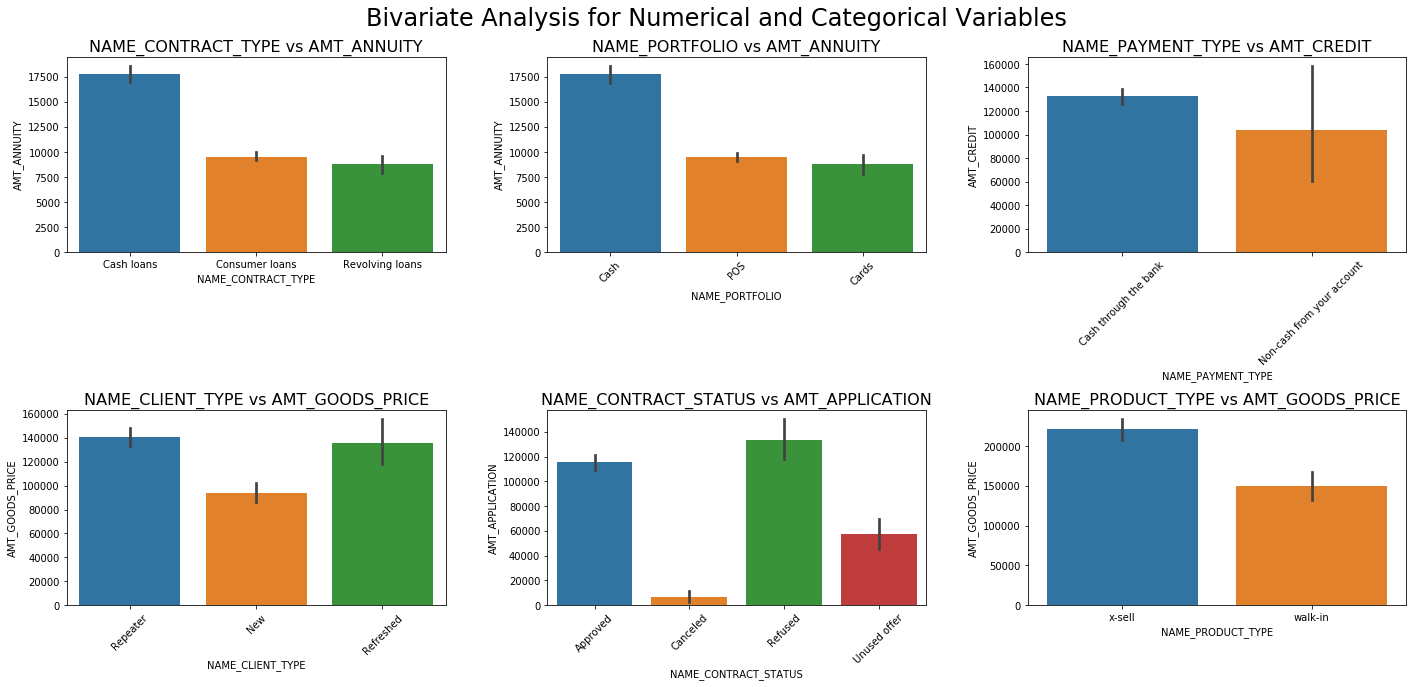

In [73]:
previous_s=previous.sample(2000)
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.title('NAME_CONTRACT_TYPE vs AMT_ANNUITY',fontsize=16)
sns.barplot(y='AMT_ANNUITY',x='NAME_CONTRACT_TYPE', data=previous_s)
plt.subplot(232)
plt.title('NAME_PORTFOLIO vs AMT_ANNUITY',fontsize=16)
sns.barplot(y='AMT_ANNUITY',x='NAME_PORTFOLIO', data=previous_s)
plt.xticks(rotation=45)
plt.subplot(233)
plt.title('NAME_PAYMENT_TYPE vs AMT_CREDIT',fontsize=16)
sns.barplot(y='AMT_CREDIT',x='NAME_PAYMENT_TYPE', data=previous_s)
plt.xticks(rotation=45)
plt.subplot(234)
plt.title('NAME_CLIENT_TYPE vs AMT_GOODS_PRICE',fontsize=16)
sns.barplot(y='AMT_GOODS_PRICE',x='NAME_CLIENT_TYPE', data=previous_s)
plt.xticks(rotation=45)
plt.subplot(235)
plt.title('NAME_CONTRACT_STATUS vs AMT_APPLICATION',fontsize=16)
sns.barplot(y='AMT_APPLICATION',x='NAME_CONTRACT_STATUS', data=previous_s)
plt.xticks(rotation=45)
plt.subplot(236)
plt.title('NAME_PRODUCT_TYPE vs AMT_GOODS_PRICE',fontsize=16)
sns.barplot(y='AMT_GOODS_PRICE',x='NAME_PRODUCT_TYPE', data=previous_s)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical and Categorical Variables',fontsize=24)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:green;">1. The annuity amount is very high for cash loans when compared to Consumer and Revolving loans.<br>2. Application Amount is more for rejected loans than other types of loans.
    <br>3. Amount credit is more for cashless payment type when compared to other payments<br>4. The annuity amount of the Cash Portfolio is high compared to POS and cards.

#### Analysis between CNT_PAYMENT and NAME_CONTRACT_STATUS

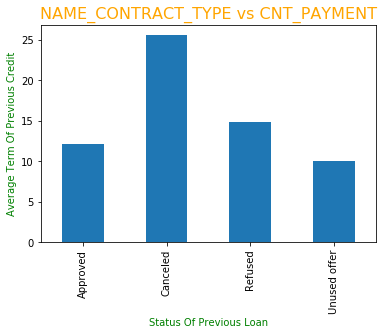

In [74]:
previous.groupby(['NAME_CONTRACT_STATUS'])['CNT_PAYMENT'].mean().plot.bar()
plt.title('NAME_CONTRACT_TYPE vs CNT_PAYMENT',fontsize=16, color='orange')
plt.xlabel('Status Of Previous Loan',color='Green')
plt.ylabel('Average Term Of Previous Credit',color='Green')
plt.show()


<p style="font-family: Arial; font-size:1.0em;color:green;">This shows the average term of previous credit on previous loans being cancelled are more than being approved.

### Numerical data.

<p style="font-family: Arial; font-size:1.0em;color:green;">Up on considering a set of 150 points for the below bivariate analysis.

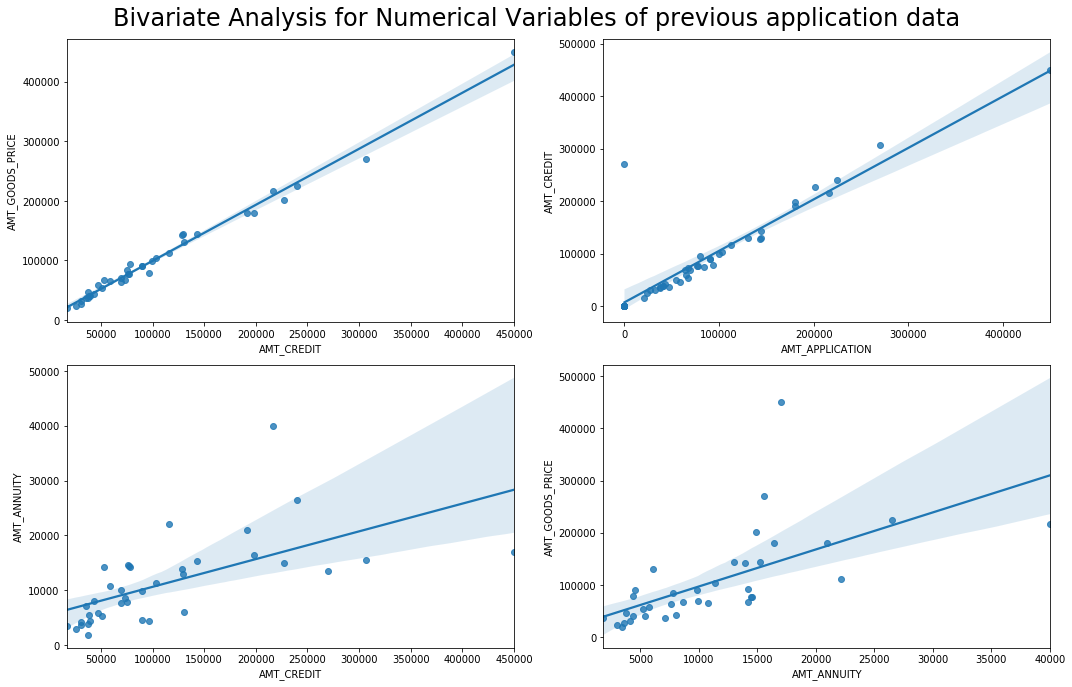

In [75]:
previous_sample=previous.sample(n=50, random_state=42)
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.regplot(y='AMT_GOODS_PRICE',x='AMT_CREDIT', data=previous_sample)
plt.subplot(222)
sns.regplot(y='AMT_CREDIT',x='AMT_APPLICATION', data=previous_sample)
plt.subplot(223)
sns.regplot(y='AMT_ANNUITY',x='AMT_CREDIT', data=previous_sample)
plt.subplot(224)
sns.regplot(y='AMT_GOODS_PRICE',x='AMT_ANNUITY', data=previous_sample)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical Variables of previous application data',fontsize=24)
plt.show()           

<p style="font-family: Arial; font-size:1.0em;color:Green;"><b>Observations</b>.<br>The correlation between goods price and Credit amount is 0.98 which is very close to 1.<br> Also the correlation between AMT_CREDIT and AMT_APPLICATION is 0.9.

<p style="font-family: Arial; font-size:1.0em;color:green;">
From the above analysis, below mentioned columns are considered as the important features which effect the contract status of the bank: <br> 1. NAME_CONTRACT_TYPE<br>2. AMT_ANNUITY<br>3. AMT_APPLICATION<br>4. AMT_CREDIT<br>5. AMT_GOODS_PRICE<br>6. NAME_CONTRACT_STATUS<br>7. NAME_PAYMENT_TYPE<br>8. NAME_CLIENT_TYPE<br>9. NAME_PORTFOLIO<br>10. CHANNEL_TYPE<br>11. NAME_YIELD_GROUP<br>12. DAYS_FIRST_DUE<br>13. DAYS_LAST_DUE_1ST_VERSION<br>14. DAYS_LAST_DUE<br>15. NFLAG_INSURED_ON_APPROVAL

<p style="font-family: Arial; font-size:1.0em;color:green;">We also considered current load id and past loan id's for merging and grouping purposes.

In [76]:
previous_final=previous[['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE','NAME_YIELD_GROUP','DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
        'NFLAG_INSURED_ON_APPROVAL']]
previous_final.shape


(1432281, 17)

### Merge the dataframes

<p style="font-family: Arial; font-size:1.0em;color:blue;">Merging the application_final and precious_final datasets on the current loan id.

In [77]:
final=pd.merge(application_final,previous_final,how='inner', on='SK_ID_CURR')

In [78]:
final.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,AMT_INCOME_TOTAL,TARGET,...,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,100002,Working,House / apartment,Secondary / secondary special,Single / not married,406597.5,351000.0,24700.5,202500.0,1,...,Approved,NaN,New,POS,Stone,low_normal,-565.0,125.0,-25.0,0.0
1,100003,State servant,House / apartment,Higher education,Married,1293502.5,1129500.0,35698.5,270000.0,0,...,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,-2310.0,-1980.0,-1980.0,1.0
2,100004,Working,House / apartment,Secondary / secondary special,Single / not married,135000.0,135000.0,6750.0,67500.0,0,...,Approved,Cash through the bank,New,POS,Regional / Local,middle,-784.0,-694.0,-724.0,0.0
3,100006,Working,House / apartment,Secondary / secondary special,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Canceled,NaN,Repeater,NaN,Credit and cash offices,NaN,NaN,NaN,NaN,NaN
4,100006,Working,House / apartment,Secondary / secondary special,Civil marriage,312682.5,297000.0,29686.5,135000.0,0,...,Approved,Cash through the bank,Repeater,POS,Country-wide,high,-281.0,49.0,NaN,0.0


### Calculate the  Null values

In [79]:
round(final.isnull().sum()*100/len(final.index),2)

SK_ID_CURR                    0.00
NAME_INCOME_TYPE              0.00
NAME_HOUSING_TYPE             0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
AMT_CREDIT_x                  0.00
AMT_GOODS_PRICE_x             0.09
AMT_ANNUITY_x                 0.01
AMT_INCOME_TOTAL              0.00
TARGET                        0.00
SK_ID_PREV                    0.00
NAME_CONTRACT_TYPE            0.03
AMT_ANNUITY_y                25.13
AMT_APPLICATION               0.00
AMT_CREDIT_y                  0.00
AMT_GOODS_PRICE_y            25.76
NAME_CONTRACT_STATUS          0.00
NAME_PAYMENT_TYPE            40.00
NAME_CLIENT_TYPE              0.11
NAME_PORTFOLIO               25.13
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP             34.21
DAYS_FIRST_DUE               42.03
DAYS_LAST_DUE_1ST_VERSION    45.38
DAYS_LAST_DUE                51.57
NFLAG_INSURED_ON_APPROVAL    39.50
dtype: float64

<font color='Green'><h1><center>Observations</center></h2></font>

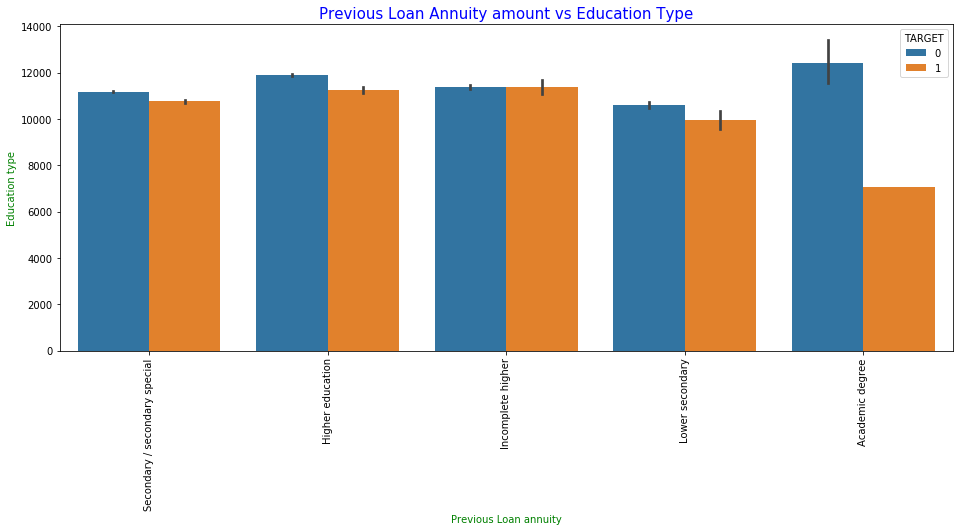

In [80]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.barplot(data =final, y='AMT_ANNUITY_y',hue='TARGET',x='NAME_EDUCATION_TYPE')
plt.title('Previous Loan Annuity amount vs Education Type',fontsize=15,color='blue')
plt.xlabel('Previous Loan annuity',fontsize=10,color='Green')
plt.ylabel('Education type',fontsize=10,color='Green')
plt.show()

<b>OBSERVATION 1:</b>
<p style="font-family: Arial; font-size:1.0em;color:Green;">
From the above graph, we can conclude that bank can give loans to clients with academic degree as they have low payment difficulties when compared to other education types and they are less likely to default.


In [ ]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.barplot(data =final, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

<b>OBSERVATION 2:</b>
<p style="font-family: Arial; font-size:1.0em;color:Green;">
    <br>We can conclude that bank should avoid giving loans to the housing type of office and co-op apartment as they are having difficulties in payment. Bank can focus mostly on category of clients in rented apartments,house/apartments and with parents for successful payments

In [ ]:
payment_difficulty_yield = pd.pivot_table(final, values='TARGET', index=['NAME_YIELD_GROUP'],columns=['NAME_CLIENT_TYPE'], aggfunc=np.mean)

In [ ]:
plt.figure(figsize=(10,6))
payment_difficulty_yield.T.plot(kind='bar')
plt.ylabel('% of Loan-Payment Difficulties',fontsize=10,color='Green')
plt.xlabel('CLient Type',fontsize=10,color='Green')
plt.title('% of Loan Payment Difficulties for Interest group and Client type', fontdict={'fontsize':15},color='blue')
plt.legend(loc='lower right')
plt.show()

<b>OBSERVATION 3:</b>
<p style="font-family: Arial; font-size:1.0em;color:Green;">
        <br>We can conclude from the above graph that the bank should focus more on Client type 'Refreshed' and 'Repeater' with yield types 'low_action', 'low-normal' and 'middile'  as they have low payment difficulties when compared to other cases.

In [ ]:
payment_difficulty = pd.pivot_table(final, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

In [ ]:
plt.figure(figsize=(8,6))
ax = payment_difficulty.T.plot(kind='bar')
ax.set_ylabel('% of Loan-Payment Difficulties',fontsize=10,color='Green')
ax.set_xlabel('Loan Status',fontsize=10,color='Green')
plt.title('% of Loan Payment Difficulties for Loan Status and Loan type', fontdict={'fontsize':20},color='blue')
plt.legend(loc='upper left')
plt.show()

<b>OBSERVATION 4:</b>
<p style="font-family: Arial; font-size:1.0em;color:Green;">
    It can be observed from the graph that the <b>New</b> clients under <b>Cancelled</b> status have more payment difficulties compared to other cases. Bank should focus more on clients with <b>Approved</b> and <b>Unused offer</b> status as they are less likely to default

#### Let us now consider only approved loans

In [ ]:
final_approved = final.loc[final['NAME_CONTRACT_STATUS']=='Approved', ['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby(['SK_ID_CURR']).count().reset_index()
final_approved.rename(columns={'NAME_CONTRACT_STATUS': 'NUMBER_OF_APPROVED_LOANS'}, inplace = True)

In [ ]:
final_approved=pd.merge(final_approved,application[['SK_ID_CURR','TARGET']],how='inner',on='SK_ID_CURR')
final_approved=final_approved[['SK_ID_CURR','NUMBER_OF_APPROVED_LOANS','TARGET']]
final_approved.head()

<p style="font-family: Arial; font-size:1.0em;color:green;">Distribution of Target variables among appproved loans

In [ ]:
final_approved['TARGET'].value_counts(normalize=True)

<p style="font-family: Arial; font-size:1.0em;color:Green;">There is huge amount of data imbalance in the 'TARGET' variable, leading to delusive results.<br>
Therefore, we are extracting a sample from the dataframe 'final_approved' where 'TARGET' variable is balanced which can be used for the further analysis.

In [ ]:
final_approved_target0=final_approved.loc[final_approved['TARGET']==0].sample(frac=0.094, random_state=1)

In [ ]:
# Check the length of dataframe - containing 'TARGET' == 0
len(final_approved_target0)

In [ ]:
# Check the length of dataframe - containing 'TARGET' == 1
len(final_approved.loc[final_approved['TARGET']==1])

In [ ]:
# Concat the two dataframes.
final_sample=pd.concat([final_approved_target0,final_approved.loc[final_approved['TARGET']==1]])

In [ ]:
sns.countplot(x='NUMBER_OF_APPROVED_LOANS',hue='TARGET',data=final_sample)
plt.title("Number of approved loans with respect to target",fontdict={'fontsize':15},color='blue')
plt.ylabel('count of approved loans',fontsize=10,color='Green')
plt.xlabel('Number of approved loans',fontsize=10,color='Green')
plt.legend(loc='upper right')
plt.show()

<b>OBSERVATION 5:</b>
<p style="font-family: Arial; font-size:1.0em;color:Green;">
The above graph depicts the number of <b>APPROVED</b> loans for both the Target variables.<br>
Clients with 1 and 2 approved loans are having more payment difficulties.But, for customers with atleast 3 approved loans approved, the number of default cases are less when compared to clients with 1 and 2 approved loans(default cases). <br>Therefore,<b> approved loans equal to 3 and above </b> from the previous applications represent a low default case.